# PETLOVE CASE: CHURN

## Preparo do Ambiente

### Importando bibliotecas

In [380]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta, date

df = pd.read_csv('data-test-analytics.csv')

In [381]:
df.describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,216.894709,8.49980,1174.888603,5.415400,67.192900
std,22.757213,3.02604,763.141973,3.457577,175.723276
min,131.378672,1.00000,0.000000,0.000000,1.000000
25%,201.398851,6.00000,494.873564,2.000000,31.000000
50%,217.019478,8.00000,1172.751918,5.000000,35.000000
75%,232.455042,11.00000,1798.475045,8.000000,39.000000
max,303.386848,19.00000,3225.654163,11.000000,1820.000000


### Primeira Leitura dos Dados

In [382]:
df.head()

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search
3,b5e4caeb-3a9b-49ed-aa33-5acd06b162c1,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,52593437a405b11b3557170680ef80c8,d3fb45188d95c8d7cc49da5b4f727c86,0a6f0c54db1e6f19347f96b50f8092a4,11/21/80 12:00 AM,active,3.34.3,Campos do Campo,PE,Confisco,01/10/21 11:23 AM,204.113227,8,1224.679359,6,39,organic_search
4,d4ff61fc-f008-4e19-b8ae-bd70cfa3ae27,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,dbda4b778a966c21904238ed2d2005db,a0f76bc49b4c43327b536da6e1a1465e,143b9f169b4fa1692f6d79b5682169b5,07/07/59 12:00 AM,active,3.19.8,das Neves,RJ,Vila Suzana Segunda Seção,01/18/21 11:23 AM,252.940997,9,2023.527980,8,31,crm


### Datas Ambíguas

Para evitar ambiguidade ao lidar com análises que envolvam o tempo, será necessário tratar as datas de todas as colunas. 
Isso porque essas se encontram com o formato dd/mm/aa , onde anos com apenas 2 dígitos.

In [383]:
df[['created_at','updated_at','deleted_at','birth_date','last_date_purchase']].head()

,created_at,updated_at,deleted_at,birth_date,last_date_purchase
0,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,07/10/74 12:00 AM,01/14/21 11:23 AM
1,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,07/06/40 12:00 AM,01/08/21 11:23 AM
2,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,03/18/63 12:00 AM,01/07/21 11:23 AM
3,07/21/18 10:17 AM,01/10/21 11:23 AM,NaN,11/21/80 12:00 AM,01/10/21 11:23 AM
4,06/08/18 12:09 PM,01/18/21 11:23 AM,NaN,07/07/59 12:00 AM,01/18/21 11:23 AM


Tentativa de conversão direta utilizando to_datetime() do pandas

In [384]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['deleted_at'] = pd.to_datetime(df['deleted_at'])
df['last_date_purchase'] = pd.to_datetime(df['last_date_purchase'])
df[['created_at','updated_at','deleted_at','birth_date','last_date_purchase']].head(10)


,created_at,updated_at,deleted_at,birth_date,last_date_purchase
0,2017-08-15 07:05:00,2021-01-14 11:23:00,NaT,1974-07-10,2021-01-14 11:23:00
1,2019-12-31 21:53:00,2021-01-08 11:23:00,NaT,2040-07-06,2021-01-08 11:23:00
2,2019-03-07 23:46:00,2021-01-07 11:23:00,NaT,2063-03-18,2021-01-07 11:23:00
3,2018-07-21 10:17:00,2021-01-10 11:23:00,NaT,1980-11-21,2021-01-10 11:23:00
4,2018-06-08 12:09:00,2021-01-18 11:23:00,NaT,2059-07-07,2021-01-18 11:23:00
5,2017-06-09 16:33:00,2021-01-17 11:23:00,NaT,2055-04-17,2021-01-17 11:23:00
6,2017-05-25 20:02:00,2021-01-14 11:23:00,NaT,1980-06-23,2021-01-14 11:23:00
7,2017-10-17 06:53:00,2021-01-16 11:23:00,NaT,2056-12-10,2021-01-16 11:23:00
8,2017-12-09 04:32:00,2021-01-10 11:23:00,NaT,1972-07-05,2021-01-10 11:23:00
9,2019-10-24 09:17:00,2021-01-05 11:23:00,NaT,2066-05-11,2021-01-05 11:23:00


In [385]:
print(F'Máximo created_at: {df.created_at.max()}')


Máximo created_at: 2021-02-18 05:04:00


Pode-se observar alguns erros aparentes principalmente na coluna ***birth_date***. Contudo, podemos descartar a presença desse erro nas colunas relacionadas diretamente ao e-commerce, visto que ***Marcio Waldman fundou sua primeira versão em 1999***, a data de criação máxima após a conversão  é de ***2021-02-18 05:04:00*** o que indica que não há valores de 1999 transformados em 2099 e a biblioteca (***Pandas***) interpretou todos os valores acima do ano 2000 corretamente. Se pode inferir então, que as datas reformatadas nas colunas ***created_at, updated_at, deleted_at, last_date_purchase*** estão corretas e não precisam de correções. 
As correções serão aplicadas a todos os casos considerados lógicamente impossíveis, ou seja, ***birth_dates*** superiores a data atual.

In [386]:
futuro = df['birth_date'].dt.date > date(year=2022,month=2,day=15)
df.loc[futuro, 'birth_date'] -= timedelta(days=365.25*100)


print(F'Máximo birth_date: {df.birth_date.max()}')
print(F'Mínimo birth_date: {df.birth_date.min()}')
df['birth_date'].head()

Máximo birth_date: 1996-02-14 00:00:00
Mínimo birth_date: 1940-02-21 00:00:00


0   1974-07-10
1   1940-07-06
2   1963-03-18
3   1980-11-21
4   1959-07-07
Name: birth_date, dtype: datetime64[ns]

O código acima, utiliza uma comparação entre o dataframe ***birth_date*** e a data atual para guardar na variável ***futuro*** os valores que estão acima do limiar definido. 
Esse vetor é então utilizado para localizar dentro do dataframe ***birth_date*** essas idades equivocadas e então substitui-las por suas correspondentes 1 século antes, denotado na função ***timedelta***. 

### Conferência de Valores Nulos

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  10000 non-null  object        
 1   created_at          10000 non-null  datetime64[ns]
 2   updated_at          10000 non-null  datetime64[ns]
 3   deleted_at          505 non-null    datetime64[ns]
 4   name_hash           10000 non-null  object        
 5   email_hash          10000 non-null  object        
 6   address_hash        10000 non-null  object        
 7   birth_date          10000 non-null  datetime64[ns]
 8   status              10000 non-null  object        
 9   version             10000 non-null  object        
 10  city                10000 non-null  object        
 11  state               10000 non-null  object        
 12  neighborhood        10000 non-null  object        
 13  last_date_purchase  10000 non-null  datetime64[

In [388]:
df.isnull().sum()

id                       0
created_at               0
updated_at               0
deleted_at            9495
name_hash                0
email_hash               0
address_hash             0
birth_date               0
status                   0
version                  0
city                     0
state                    0
neighborhood             0
last_date_purchase       0
average_ticket           0
items_quantity           0
all_revenue              0
all_orders               0
recency                  0
marketing_source         0
dtype: int64

### A feature *deleted_at* é redundante se comparada a *updated_at* ?

In [389]:
df2 = df[['updated_at','deleted_at']]

df2.loc[df2['updated_at'] == df2['deleted_at'] , 'conferencia' ] = 'Confere'  
df2.loc[df2['updated_at'] != df2['deleted_at'], 'conferencia'] = 'NConfere' 

#df2.loc[df2['Conferencia'] == 'Confere'].head()
confere = len(df2.loc[df2['conferencia'] == 'Confere'])
print(F'Datas Conferidas Entre updated_at e deleted_at:{confere}')

Datas Conferidas Entre updated_at e deleted_at:505


C:\Users\samuc\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\samuc\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Após se comparar ***updated_at*** ae ***deleted_at*** constata-se que o universo de clientes que cancelaram suas assinaturas é de **505** e que a variável ***deleted_at*** é redundante para a análise.

## Adequação das variáveis para a análise

### Pode-se perceber dados que não serão relevantes, assim como dados que podem ser extraidos para facilitar a visualização.

Adicionando uma coluna ***duracao*** possbilita descrever linearmente a permanência do cliente o que facilitará as análises.

Além disso podemos substituir a coluna de ***birth_date*** pela ***idade*** do cliente.

Features como ***id***, ***name_hash*** , ***email_hash*** e ***address_hash*** terão pouco ou nenhum impacto na decisão do cliente poderão ser descartados da análise. 

Pode-se utilizar somente a coluna ***updated_at*** já que a ***deleted_at*** é atualizada uma ultima vez sendo que os valores de atulização são fieis aos valores da data de cancelamento. 

Pode-se utilizar ainda uma coluna ***churn*** para seguimentar clientes que cancelaram ou não pelo churn. Neste caso, será atribuído **1** para os que cancelaram, **0** para os ativos e **-1** para clientes pausados.

In [390]:
df.loc[df['status'] == 'active' , 'churn' ] = 0
df.loc[df['status'] == 'canceled', 'churn' ] = 1
df.loc[df['status'] == 'paused', 'churn' ] = -1 

df['duracao'] = (df['updated_at'] - df['created_at']).dt.days
df['idade'] = round((pd.Timestamp.now() - df['birth_date']).dt.days / 365,1)

df = df.drop(['id','name_hash','email_hash','address_hash','birth_date','deleted_at'],axis=1)

### Conferindo Intervalos Negativos

In [391]:
neg_dur = len(df.loc[df['duracao'] < 0])
neg_age = len(df.loc[df['idade'] < 0])
print(F'Valores Negativos em Duração: {neg_dur}')
print(F'Valores Negativos em Idade:{neg_age}')

Valores Negativos em Duração: 177
Valores Negativos em Idade:0


Existem **177 intevalos negativos*** na variável duracao, esses valores vão precisar ser tratados antes de realizarmos as análises.

In [392]:
df.loc[df['duracao'] < 0].head()

,created_at,updated_at,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source,churn,duracao,idade
54,2021-01-19 13:44:00,2021-01-13 11:23:00,active,5.32.2,Peixoto,MS,Marajó,2021-01-13 11:23:00,252.949592,7,0.0,0,36,telegram_whatsapp,0.0,-7,70.7
77,2021-01-29 00:22:00,2021-01-07 11:23:00,paused,3.27.10,Nunes de Novaes,CE,Santa Lúcia,2021-01-07 11:23:00,196.241001,9,0.0,0,42,paid_search,-1.0,-22,37.7
148,2021-02-11 05:43:00,2021-01-09 11:23:00,active,2.33.10,Moraes,RR,Dom Joaquim,2021-01-09 11:23:00,197.866995,5,0.0,0,40,telegram_whatsapp,0.0,-33,26.3
150,2021-02-08 07:03:00,2021-01-12 11:23:00,active,3.33.10,Vieira do Amparo,RN,Ápia,2021-01-12 11:23:00,207.228636,11,0.0,0,37,crm,0.0,-27,36.2
324,2021-02-11 04:54:00,2021-01-14 11:23:00,active,1.20.8,Ribeiro,GO,Conjunto Santa Maria,2021-01-14 11:23:00,209.218193,12,0.0,0,35,organic_search,0.0,-28,45.1


Os valores de ***created_at*** que forem menores que ***updated_at*** serão substituidos pela data da ultima atulização (***updated_at**) subtraída da ***recency*** que é variável que diz a quanto tempo o cliente realizou sua última operação na plataforma. Pois logicamente, essas assinaturas existem no minímo a partir da última compra. 

In [393]:
df.loc[df['duracao'] < 0 , 'negative' ] = 1
df.loc[df['duracao'] > 0, 'negative' ] = 0

r = df.loc[df['negative'] == 1].recency

df.loc[df['negative'] == 1, 'created_at'] = df.loc[df['negative'] == 1].updated_at - pd.to_timedelta(r, unit='d') 

df['duracao'] = (df['updated_at'] - df['created_at']).dt.days
df = df.drop(['negative'],axis=1)

neg_dur = df.loc[df['duracao'] < 0]
print(F'Valores Negativos em Duração: {len(neg_dur)}')


Valores Negativos em Duração: 0


O código acima cria uma coluna ***negative*** para segregar valores de ***duracao*** negativos e assim facilitar seu tratamento. Os valores segregados em ***created_at*** são substituídos pela subtração entre a ***updated_at*** e ***recency***.
Após isso se atualiza novamente a coluna ***duracao*** e pode observar na contagem de valores negativos que já não há mais intervalos errados.

## Análise

### Verificar a distribuição das classes relacionadas ao *status*

<AxesSubplot:xlabel='status', ylabel='Count'>

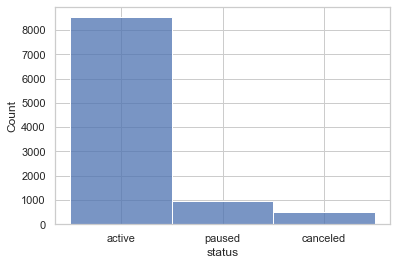

In [394]:
#checar a distribuição entre clientes ativos pausados e cancelados

df['status'].value_counts()
sns.histplot(df['status'])

### Descrevendo as relações estatisticas evidentes

In [395]:
df.describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency,churn,duracao,idade
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,216.894709,8.49980,1174.888603,5.415400,67.192900,-0.04660,866.520800,53.963630
std,22.757213,3.02604,763.141973,3.457577,175.723276,0.38137,526.349662,16.057873
min,131.378672,1.00000,0.000000,0.000000,1.000000,-1.00000,0.000000,26.000000
25%,201.398851,6.00000,494.873564,2.000000,31.000000,0.00000,404.000000,40.200000
50%,217.019478,8.00000,1172.751918,5.000000,35.000000,0.00000,854.000000,54.000000
75%,232.455042,11.00000,1798.475045,8.000000,39.000000,0.00000,1320.250000,67.700000
max,303.386848,19.00000,3225.654163,11.000000,1820.000000,1.00000,1804.000000,82.000000


### Análise da *recency*

In [396]:
churn_recency_mean = df.loc[df['churn'] == 1].recency.mean()
notchurn_recency_mean = df.loc[df['churn'] == 0].recency.mean()
paused_recency_mean = df.loc[df['churn'] == -1].recency.mean()
mini_1 = df.loc[df['churn'] == 1].recency.min()
maxi_1 = df.loc[df['churn'] == 1].recency.max()
mini_2 = df.loc[df['churn'] == 0].recency.min()
maxi_2 = df.loc[df['churn'] == 0].recency.max()

print(F'Média de dias desde o último pedido (Churn = 1): {churn_recency_mean}')
print(F'Média de dias desde o último pedido (Churn = 0):{notchurn_recency_mean}')
print(F'Média de dias desde o último pedido (Churn = -1):{paused_recency_mean}')
print()
print(F'Intervalo mínimo de recency churn = 1 :{mini_1}')
print(F'Intervalo máximo de recency churn = 1 :{maxi_1}')
print(F'Intervalo mínimo de recency churn = 0 :{mini_2}')
print(F'Intervalo máximo de recency churn = 0 :{maxi_2}')

Média de dias desde o último pedido (Churn = 1): 680.9702970297029
Média de dias desde o último pedido (Churn = 0):34.53214453308306
Média de dias desde o último pedido (Churn = -1):34.69309989701339

Intervalo mínimo de recency churn = 1 :1
Intervalo máximo de recency churn = 1 :1820
Intervalo mínimo de recency churn = 0 :11
Intervalo máximo de recency churn = 0 :56


### Análise dos Grupos Etários

Para essa análise foram dividas as populações em cinco grupos, estes sendo:

**Grupo 1 : 26 até 37.2**    
**Grupo 2: 37.2 até 48.4**    
**Grupo 3: 48.4 até 59.6**    
**Grupo 4:59.6 até 70.8**    
**Grupo 5: 70.8 até 82**

In [397]:
# Idade e Churn
    
df.loc[(df['idade'] >= 26) & (df['idade'] < 37.2), 'age_group'] = 1
df.loc[(df['idade'] >= 37.2) & (df['idade'] < 48.4), 'age_group'] = 2
df.loc[(df['idade'] >= 48.4) & (df['idade'] < 59.6), 'age_group'] = 3
df.loc[(df['idade'] >= 59.6) &  (df['idade'] < 70.8), 'age_group'] = 4
df.loc[(df['idade'] >= 70.8) &  (df['idade'] <= 82), 'age_group'] = 5

age_c = (df.loc[df['churn'] == 1].age_group).value_counts()
churn_total = len(df.loc[df['churn'] == 1])
total_nc = (df.age_group).value_counts()

age_churn_perc = pd.DataFrame({'age_group': {1:'26 : 37.2',2:'37.2 : 48.4',3:'48.4 : 59.6 ',4:'59.6 : 70.8',5:'70.8 : 82'},
                               'churn_percentage' : age_c/churn_total,'churn_count': age_c ,
                               'total_count': total_nc ,'universal_churn_percentage': age_c/total_nc})

age_churn_perc.head()

,age_group,churn_percentage,churn_count,total_count,universal_churn_percentage
1.0,26 : 37.2,0.188119,95,1929,0.049248
2.0,37.2 : 48.4,0.198020,100,2069,0.048333
3.0,48.4 : 59.6,0.215842,109,2052,0.053119
4.0,59.6 : 70.8,0.192079,97,1985,0.048866
5.0,70.8 : 82,0.205941,104,1965,0.052926


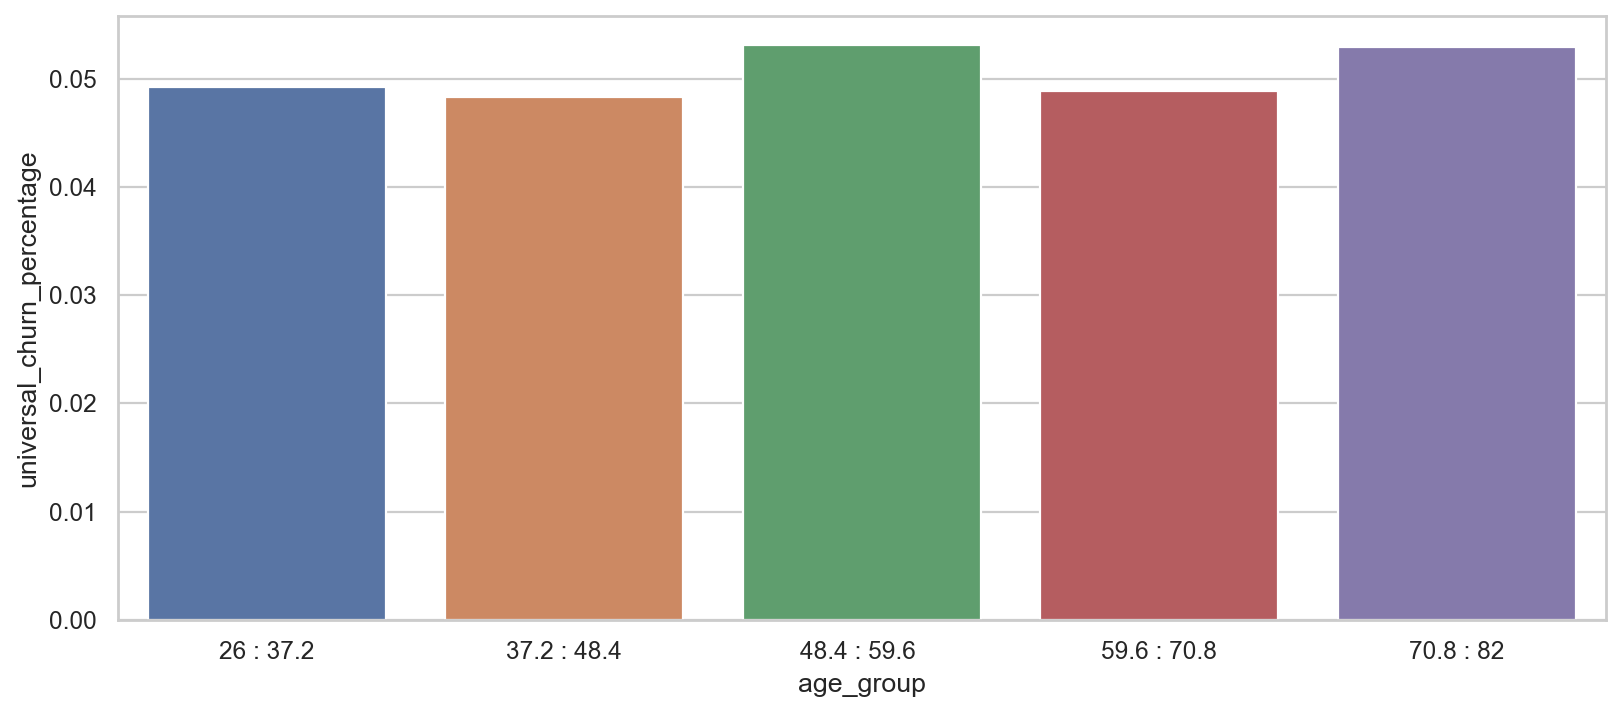

In [398]:
plt.figure(figsize=(12,5), dpi= 160)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x='age_group', y='universal_churn_percentage', data=age_churn_perc)

Após segmentar os grupos etários e promover uma visualização gráfica dos mesmos,  percebe-se uma **baixa correlação** entre a idade e a tendência ao Churn, isso se deve pela distribuição regular entre as populações.

### Análise referente a Duração da Assinatura

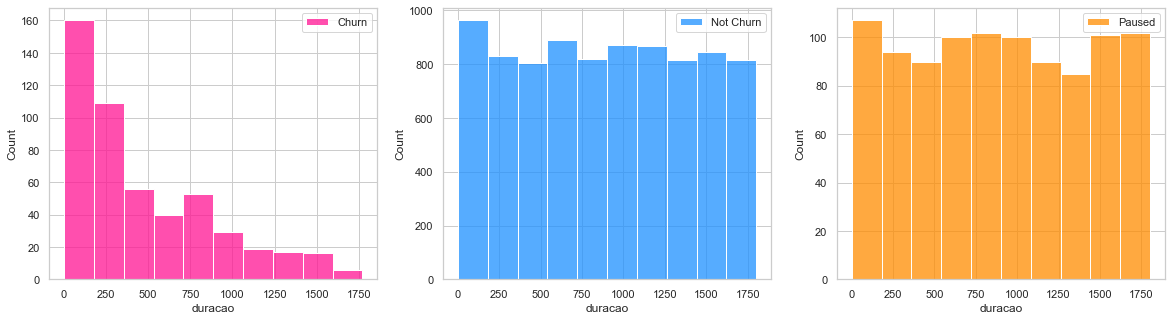

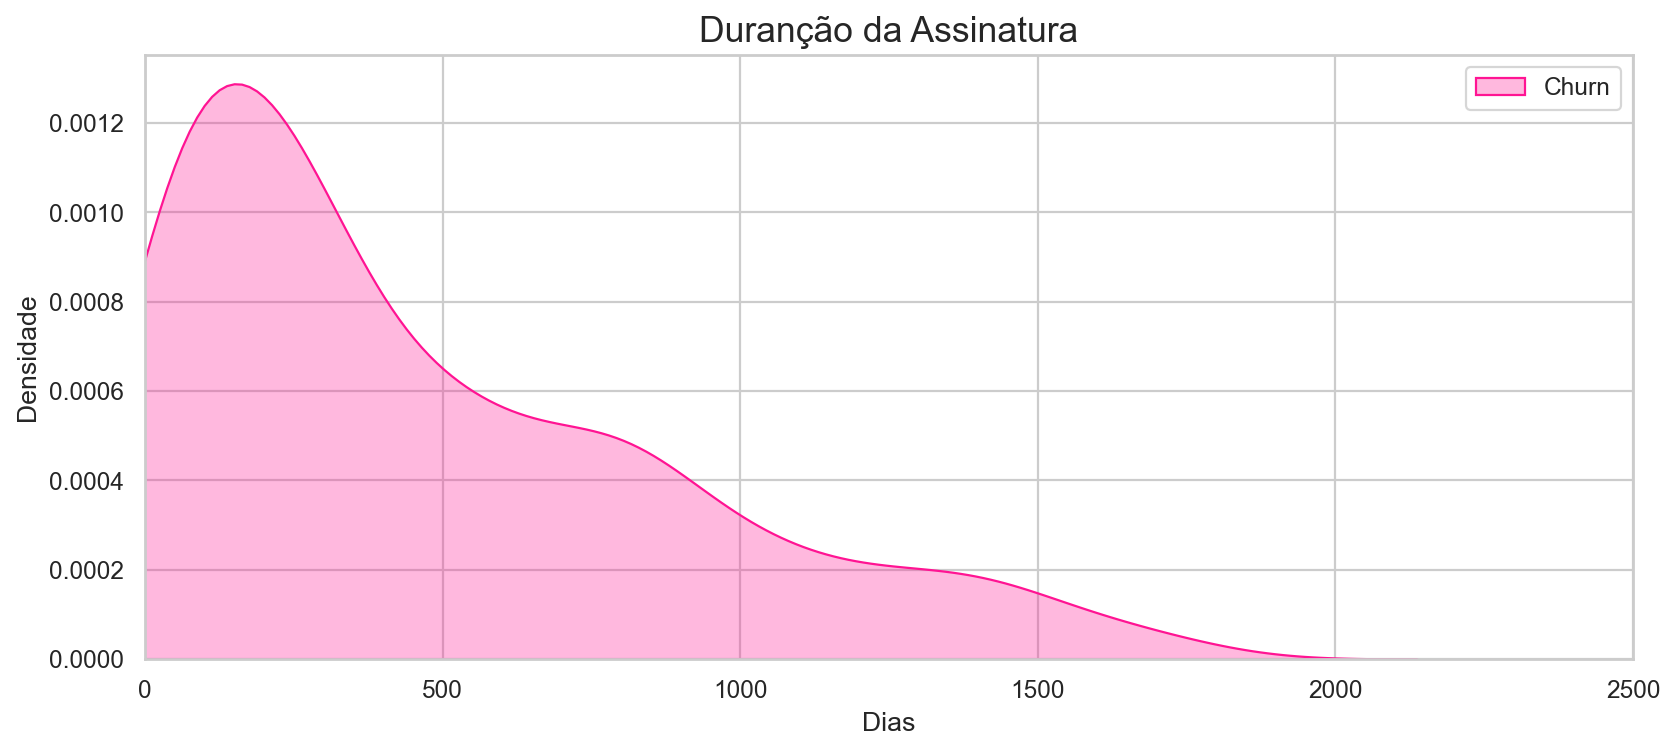

In [428]:
# Duracao de Assinatura

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))

ax = sns.histplot(df[df['churn']== 1].duracao, bins = 10, ax = axes[0],color='deeppink' ,  label = 'Churn',kde =False)
ax.legend()
ax = sns.histplot(df[df['churn']== 0].duracao, bins = 10 ,label = 'Not Churn',color='dodgerblue',  ax = axes[1],kde = False)
ax.legend()
ax = sns.histplot(df[df['churn']== -1].duracao, bins = 10 ,label = 'Paused',color='darkorange',  ax = axes[2],kde = False)
ax.legend()


plt.figure(figsize=(12,5), dpi= 160)

sns.kdeplot(df.loc[df['churn'] == 1].duracao, shade=True, color="deeppink", label="Churn",alpha=.3)
#sns.kdeplot(df.loc[df['churn'] == 0].duracao, shade=True, color="dodgerblue", label="Not Churn", alpha=.7)
#sns.kdeplot(df.loc[df['churn'] == -1].duracao, shade=True, color="darkorange", label="Paused", alpha=.10)

plt.title('Duranção da Assinatura', fontsize=16)
plt.xlim(0 ,2500)
plt.xlabel('Dias')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [400]:
churn_dur = (df.loc[df['churn'] == 1].duracao)
quartil = churn_dur.max()/4
#churn_dur_mean.describe()

churn_threshold = len((df.loc[(df['churn'] == 1)& (df['duracao'] > 0) &(df['duracao'] < quartil)]).value_counts())
churn_total = len(df.loc[df['churn'] == 1])
churn_perc_thresh = churn_threshold/churn_total

print(F'Percentual de evasões no período analisado: {(churn_perc_thresh*100)}%')
churn_dur.describe()

Percentual de evasões no período analisado: 57.227722772277225%


count     505.000000
mean      471.700990
std       423.662606
min         0.000000
25%       133.000000
50%       322.000000
75%       750.000000
max      1771.000000
Name: duracao, dtype: float64

Fica evidente o período onde ocorrem as evasões, sendo entre **0 e 442 dias**, isso é indicado pelo período do **1° Quartil (0 até 442)** com  **57,2%** de todas as evasões ocorrendo neste período.
Essa hipótese também é corroborada ao se observar o **alto desvio padrão**, o que indica uma **distribuição desbalanceda** das populações.

### Análise da Receita Total Acumulada

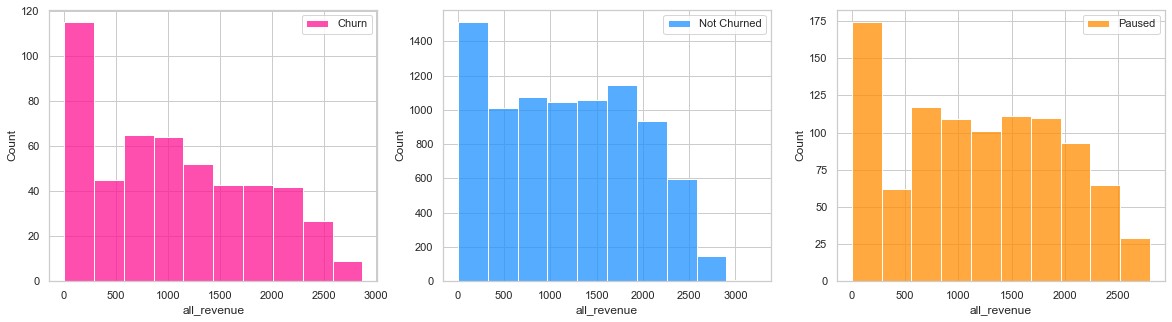

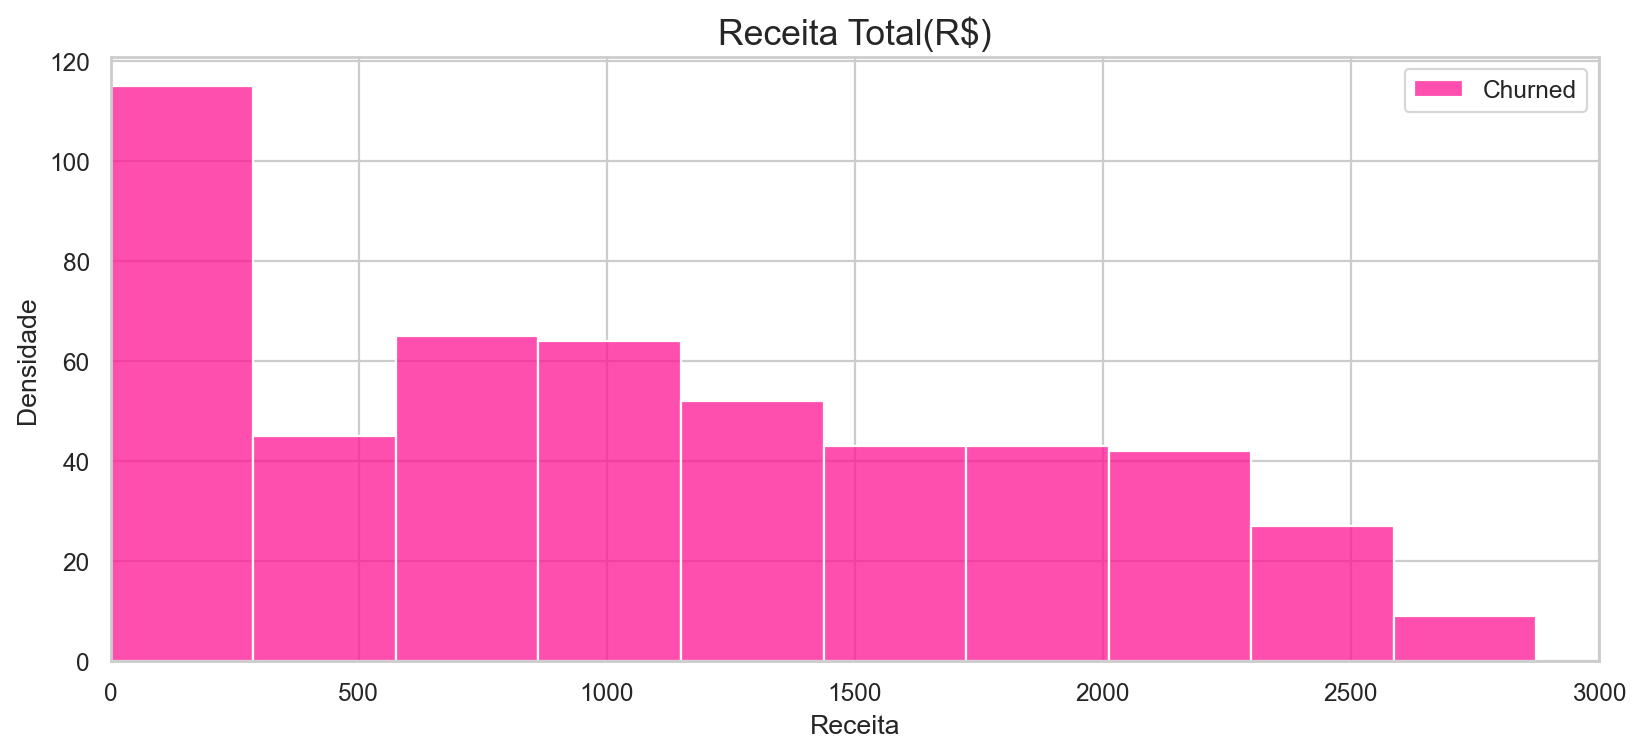

In [401]:
# Receita total

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))

ax = sns.histplot(df[df['churn']== 1].all_revenue, bins = 10, ax = axes[0],color='deeppink' , label = 'Churn',kde =False)
ax.legend()
ax = sns.histplot(df[df['churn']== 0].all_revenue, bins = 10 ,label = 'Not Churned', color='dodgerblue', ax = axes[1],kde = False)
ax.legend()
ax = sns.histplot(df[df['churn']== -1].all_revenue, bins = 10 ,label = 'Paused', color='darkorange', ax = axes[2],kde = False)
ax.legend()

plt.figure(figsize=(12,5), dpi= 160)


sns.histplot(df.loc[(df['churn'] == 1)].all_revenue,  color="deeppink", label="Churned")#, alpha=.5,shade=True)
#sns.kdeplot(df.loc[df['churn'] == 0].all_revenue,  color="dodgerblue", label="Not Churned", alpha=.7,shade=True)
#sns.kdeplot(df.loc[df['churn'] == -1].all_revenue, color="darkorange", label="Paused", alpha=.10,shade=True)

plt.title('Receita Total(R$)', fontsize=16)
plt.xlabel('Receita')
plt.ylabel('Densidade')
plt.xlim(0,3000,50)

plt.legend()
plt.show()

In [402]:
churn_allr = (df.loc[df['churn'] == 1].all_revenue)
quartil = churn_allr.max()/4

#churn_allr_mean.describe()

churn_threshold = len((df.loc[(df['churn'] == 1)& (df['all_revenue'] >= 0) &(df['all_revenue'] < quartil)]))
churn_total = len(df.loc[df['churn'] == 1])
churn_perc_thresh = churn_threshold/churn_total

print(F'Média de Gasto Acumulado antes do Churn: {churn_allr.mean()}')
print(F'Percentual de indivíduos que cancelam a assinatura nessa faixa: {(churn_perc_thresh*100)}%')
churn_allr.describe()

Média de Gasto Acumulado antes do Churn: 1059.4057517189262
Percentual de indivíduos que cancelam a assinatura nessa faixa: 39.40594059405941%


count     505.000000
mean     1059.405752
std       774.373741
min         0.000000
25%       403.113961
50%       984.359042
75%      1669.802614
max      2873.700656
Name: all_revenue, dtype: float64

A medida com que os gastos sobem, diminui a tendência ao Churn, isso porque **39,4%** dos clientes desistentes o fazem antes de acumular aproximadamente **R$1.060,00**. Isso indica que os clientes que a maioria dos clientes que desistem da assinatura o fazem nos **primeiros meses** ou seja enquanto seu gasto acumulado ainda não é significativo.
Isso é também corroborado pela curva de clientes não desistentes que seguem num ritmo de consumo aproximadamente constante. Contudo o alto desvio padrão mostra uma distribuição irregular, o que pode indicar que evasões ocorrem ainda mais precocemente. com sua concentração estando entre **0 e 500 reais**.

### Análise do Ticket Médio

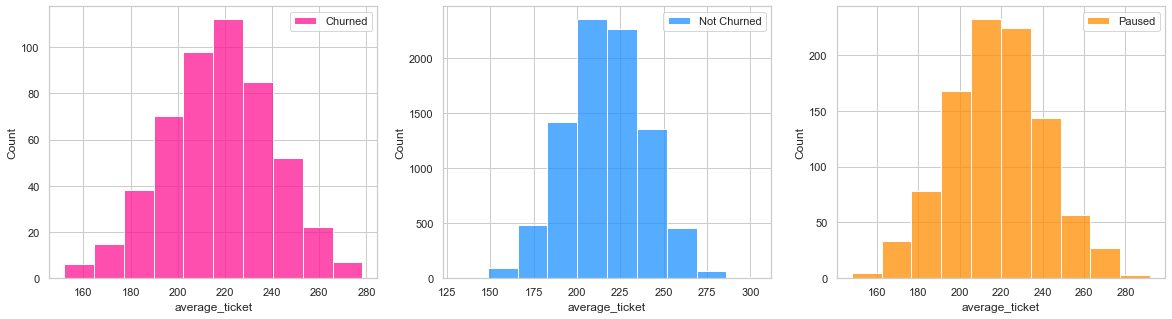

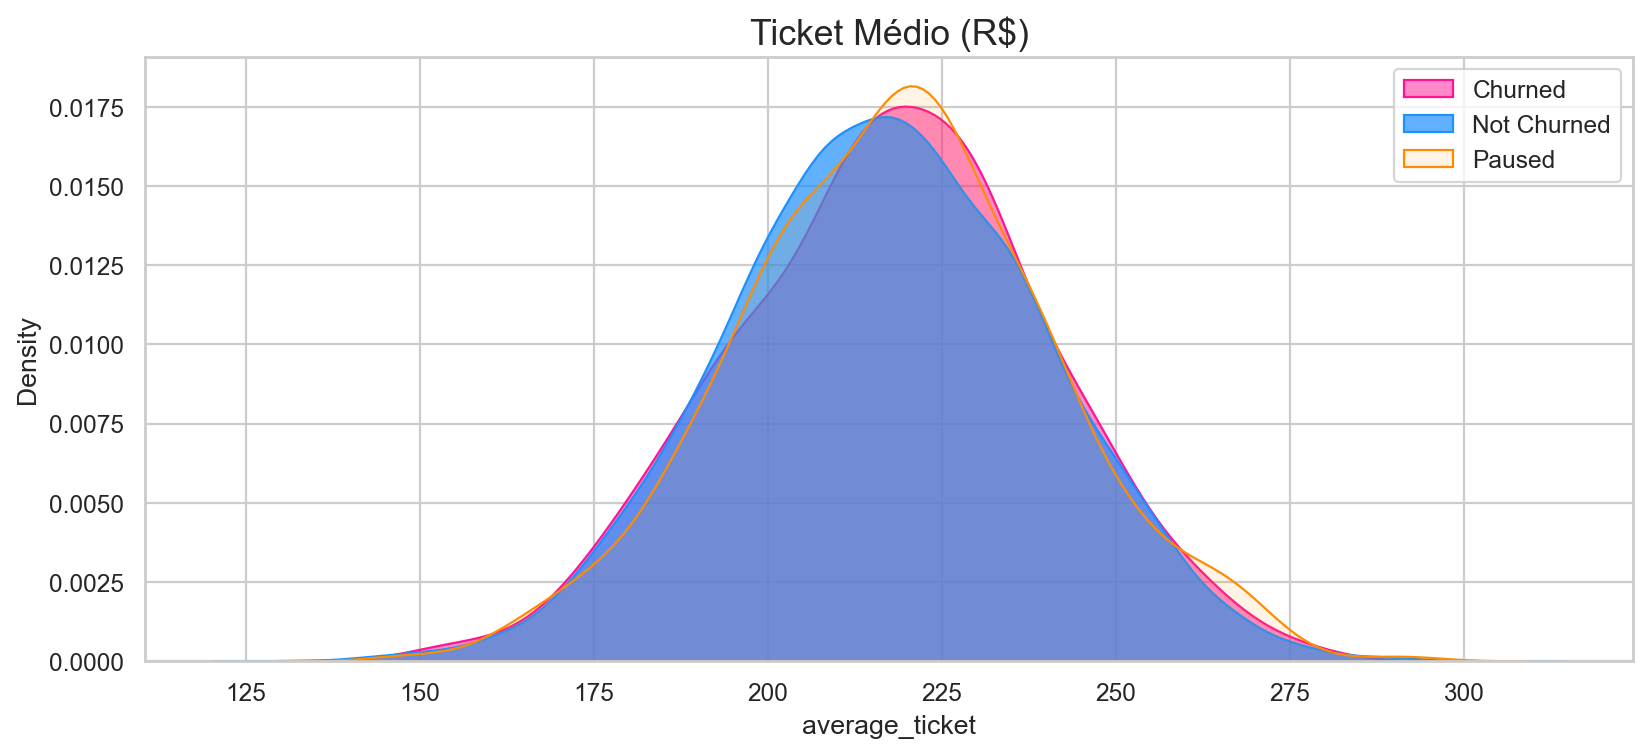

In [403]:
#Ticket Médio e Churn

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))

ax = sns.histplot(df[df['churn']== 1].average_ticket, bins = 10, ax = axes[0],color='deeppink' ,  label = 'Churned',kde =False)
ax.legend()
ax = sns.histplot(df[df['churn']== 0].average_ticket, bins = 10 ,label = 'Not Churned', color='dodgerblue' , ax = axes[1],kde = False)
ax.legend()
ax = sns.histplot(df[df['churn']== -1].average_ticket, bins = 10 ,label = 'Paused', color = 'darkorange' ,ax = axes[2],kde = False)
ax.legend()

plt.figure(figsize=(12,5), dpi= 160)

sns.kdeplot(df.loc[df['churn'] == 1].average_ticket, shade=True, color="deeppink", label="Churned", alpha=.5)
sns.kdeplot(df.loc[df['churn'] == 0].average_ticket, shade=True, color="dodgerblue", label="Not Churned", alpha=.7)
sns.kdeplot(df.loc[df['churn'] == -1].average_ticket, shade=True, color="darkorange", label="Paused", alpha=.10)

plt.title('Ticket Médio (R$)', fontsize=16)
plt.legend()
plt.show()

In [404]:
avtk = (df.loc[df['churn'] == 1].average_ticket).mean()
print(F'Ticket médio dos clientes que cancelam assinatura: {avtk}')
df.loc[df['churn'] == 1].average_ticket.describe()

Ticket médio dos clientes que cancelam assinatura: 217.43850146117575


count    505.000000
mean     217.438501
std       22.503191
min      151.804161
25%      201.934997
50%      217.998175
75%      232.135380
max      278.300436
Name: average_ticket, dtype: float64


O gráfico acima mostra que o ticket médio dos 3 perfis análisados são bastante semelhantes o que corrobora para a hipótese que esse fator **não seja determinante** no Churn.
Contudo este gráfico adiciona peso a tese que o estimulo ao consumo serve como premissa para a fidelização do cliente, visto que no estudo acima (***all_revenue***) percebe-se a tendência de um cliente interromper a sua assinatura antes dos **R$ 1060,00**

Numa análise inicial, partindo da hipótese que o ticket médio ocorre **mensalmente**, como a média da ***recency (34 dias)*** sugere. Se o ticket médio de um cliente é de cerca de **215,00** e o início das desistências se dá quando o cliente atinge um gasto de próximo a **1060,00** , se pode inferir que isso ocorre num período inferior a **5 meses** (1060/215) aproximadamente **168 dias**, o que corrobora a média de duração dos contratos desistentes que ocorrem entre **0 e 442 dias**.

### Análise dos Canais de Marketing

In [405]:
# Marketing e Churn

mkt_val = pd.unique(df['marketing_source'].values)
mkt_src = {'crm':1, 'organic_search':2, 'direct':3, 'paid_search':4, 'none':5,'telegram_whatsapp':6}
df['mkt_src'] = df['marketing_source'].map(mkt_src)

mkt_c = (df.loc[df['churn'] == 1].mkt_src).value_counts()
churn_total = len(df.loc[df['churn'] == 1])
total_nc = df.mkt_src.value_counts()

mkt_churn_perc = pd.DataFrame({'mkt_src': {1:'crm',2:'organic_search',3:'direct',4:'paid_search',5:'none',6:'telegram_whatsapp'},
                               'churn_percentage' : mkt_c/churn_total ,'churn_count': mkt_c ,
                               'total_count': total_nc ,'universal_churn_percentage': mkt_c/total_nc })

mkt_churn_perc.head(6)

,mkt_src,churn_percentage,churn_count,total_count,universal_churn_percentage
1,crm,0.085149,43,1029,0.041788
2,organic_search,0.388119,196,3699,0.052987
3,direct,0.190099,96,2149,0.044672
4,paid_search,0.138614,70,1526,0.045872
5,none,0.067327,34,529,0.064272
6,telegram_whatsapp,0.130693,66,1068,0.061798


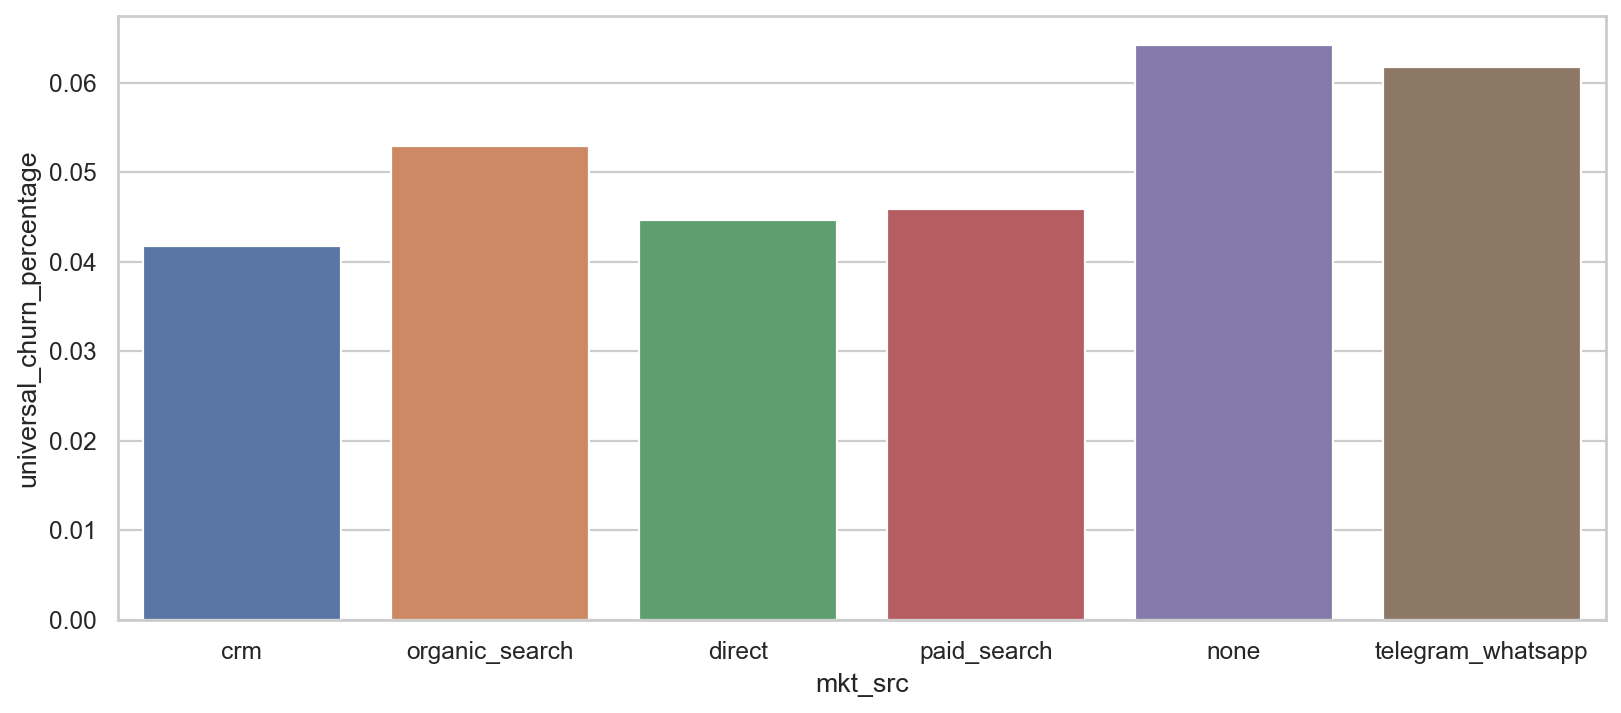

In [406]:
plt.figure(figsize=(12,5), dpi= 160)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x='mkt_src', y='universal_churn_percentage', data=mkt_churn_perc)


Estratégias de marketing dos tipos ***organic_search, none e telegram_whatsapp*** são responsáveis por **58,6%** dos cancelamentos de assinatura, suas porcentagens individuais estão ligeiramente superiores as dos restante dos grupos ne média de **6%** dos assinantes vindos desses canais cancelam. Os outros tipos de canal resultam num churn de aproximadamente **4%** cada um. 

### Análise da Versão de Assinatura

Para essa análise foram dividas as populações em oito grupos referentes aos tipos de assinatura, estes sendo:

**Grupo 0: Formato 0.X.X**

**Grupo 1: Formato 1.X.X**

**Grupo 2: Formato 2.X.X**

**Grupo 3: Formato 3.X.X**

**Grupo 4: Formato 4.X.X**

**Grupo 5: Formato 5.X.X**

**Grupo 6: Formato 6.X.X**

**Grupo 7: Formato 7.X.X**

In [412]:
# Versão da Assinatura

ver_val = pd.unique(df['version'].values)
ver_val = df['version'].str[:1]
ver_val = pd.unique(ver_val.values)
ver_src = {'0':0, '1':1, '2':2, '3':3, '4':4,'5':5,'6':6 ,'7':7}

df['simple_version'] = (df['version'].str[:1]).map(ver_src)

version_c = (df.loc[df['churn'] == 1].simple_version).value_counts()

churn_total = len(df.loc[df['churn'] == 1])
total_nc = (df.simple_version).value_counts()

version_churn_perc = pd.DataFrame({'simple_version': {0:'0.X.X',1:'1.X.X',2:'2.X.X',3:'3.X.X',
                                                      4:'4.X.X',5:'5.X.X',6:'6.X.X',7:'7.X.X'},'count':version_c,
                               'churn_percentage' : version_c/churn_total ,'churn_count': version_c ,
                               'total_count': total_nc ,'universal_churn_percentage': version_c/total_nc })


version_churn_perc.head(10)



,simple_version,count,churn_percentage,churn_count,total_count,universal_churn_percentage
0,0.X.X,1,0.001980,1,11,0.090909
1,1.X.X,13,0.025743,13,203,0.064039
2,2.X.X,84,0.166337,84,1324,0.063444
3,3.X.X,167,0.330693,167,3471,0.048113
4,4.X.X,163,0.322772,163,3375,0.048296
5,5.X.X,62,0.122772,62,1386,0.044733
6,6.X.X,14,0.027723,14,217,0.064516
7,7.X.X,1,0.001980,1,13,0.076923


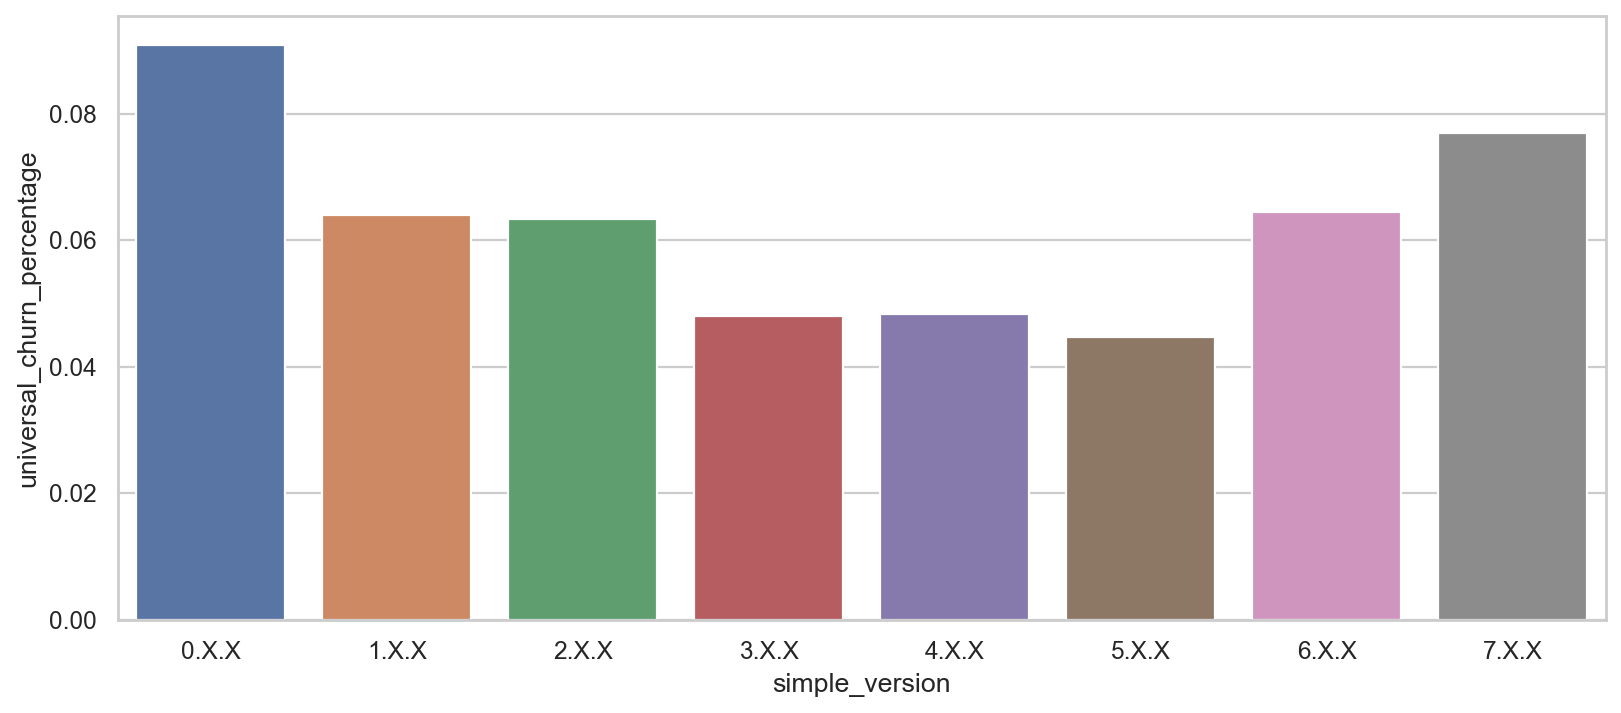

In [413]:
plt.figure(figsize=(12,5), dpi= 160)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x='simple_version', y='universal_churn_percentage', data=version_churn_perc)

Assinaturas do tipo **3.X.X** e **4.X.X** são as mais volumosas e consequentemente as que produzem mais churn, contudo essa é apenas uma relação proporcional ao número de assinaturas presentes nestes grupos.

Entretanto o plano tipo **2.X.X** também possui uma população significativa, e ao mesmo tempo seu índice de cancelamento relacionado a sua própria população é aproximadamente 2 pontos percentuais superior ao dos planos citados acima o que o torna prioritário na elaboração de uma estratégia. Somando os tipos mais significativos tem-se **22,3%** dos cancelamentos vindos de planos diferentes dos 3, 4 e 5 onde apesar de serem volumosos, possuem também menores taxas de cancelamentos em relação ao seu número total de assinaturas, ou seja, geram uma fidelização maior.

### Análise Quantidade de Itens

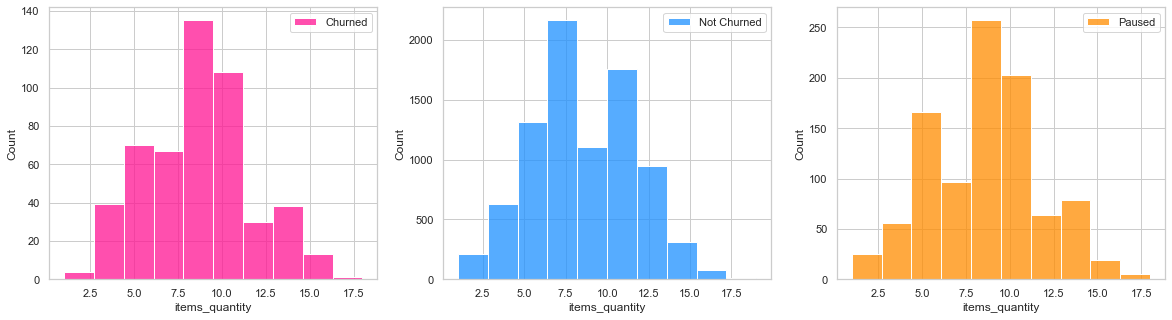

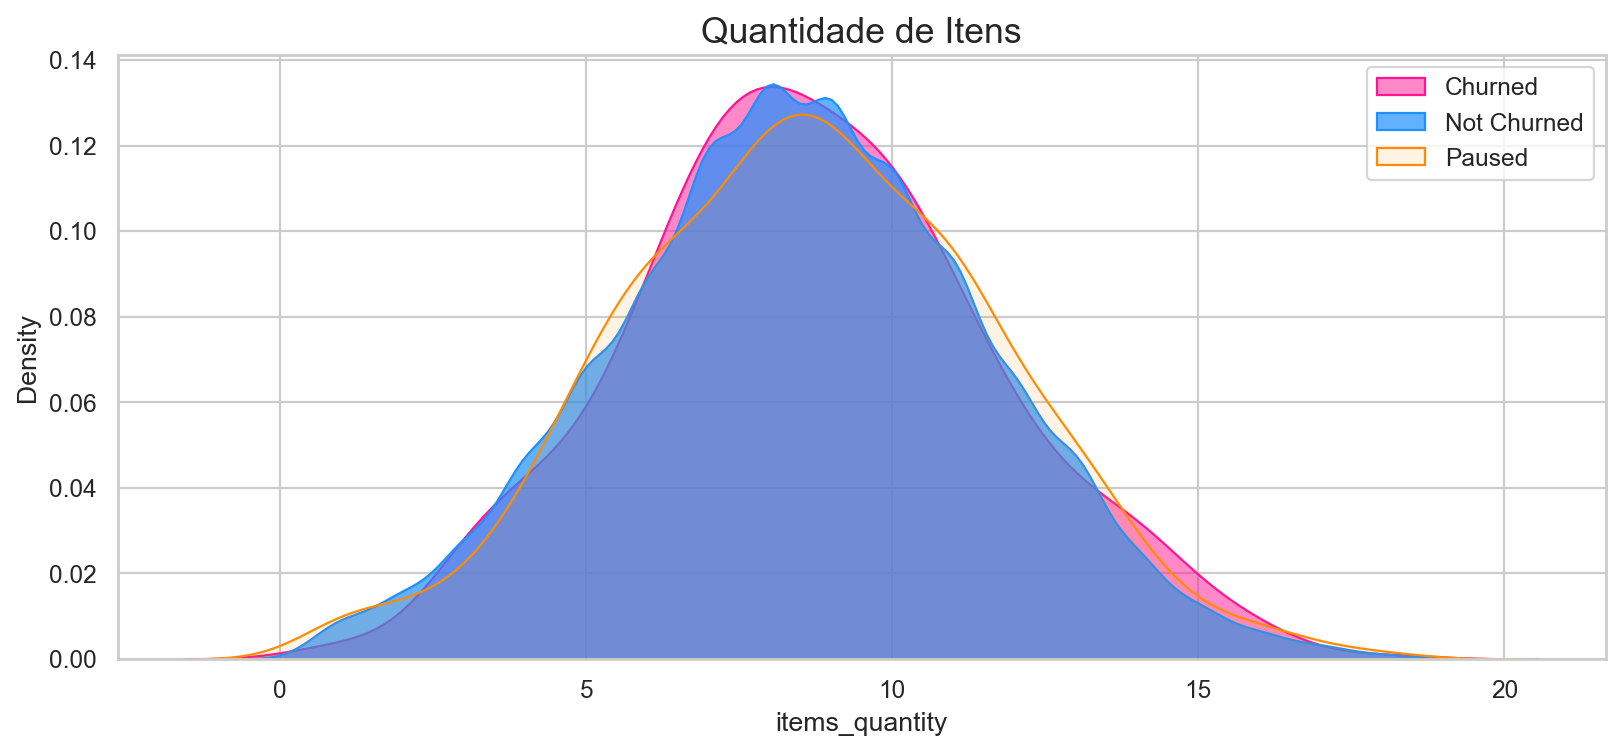

In [414]:
#Quantidade de Itens

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))

ax = sns.histplot(df[df['churn']== 1].items_quantity, bins = 10, ax = axes[0],color='deeppink' ,  label = 'Churned',kde =False)
ax.legend()
ax = sns.histplot(df[df['churn']== 0].items_quantity, bins = 10 ,label = 'Not Churned', color='dodgerblue' , ax = axes[1],kde = False)
ax.legend()
ax = sns.histplot(df[df['churn']== -1].items_quantity, bins = 10 ,label = 'Paused', color = 'darkorange' ,ax = axes[2],kde = False)
ax.legend()

plt.figure(figsize=(12,5), dpi= 160)

sns.kdeplot(df.loc[df['churn'] == 1].items_quantity, shade=True, color="deeppink", label="Churned", alpha=.5)
sns.kdeplot(df.loc[df['churn'] == 0].items_quantity, shade=True, color="dodgerblue", label="Not Churned", alpha=.7)
sns.kdeplot(df.loc[df['churn'] == -1].items_quantity, shade=True, color="darkorange", label="Paused", alpha=.10)

plt.title('Quantidade de Itens', fontsize=16)
plt.legend()
plt.show()

In [415]:
avqt = (df.loc[df['churn'] == 1].items_quantity).mean()
print(F'Quantidade média de itens dos clientes que cancelam assinatura: {avqt}')

Quantidade média de itens dos clientes que cancelam assinatura: 8.647524752475247


### Análise Número de Pedidos

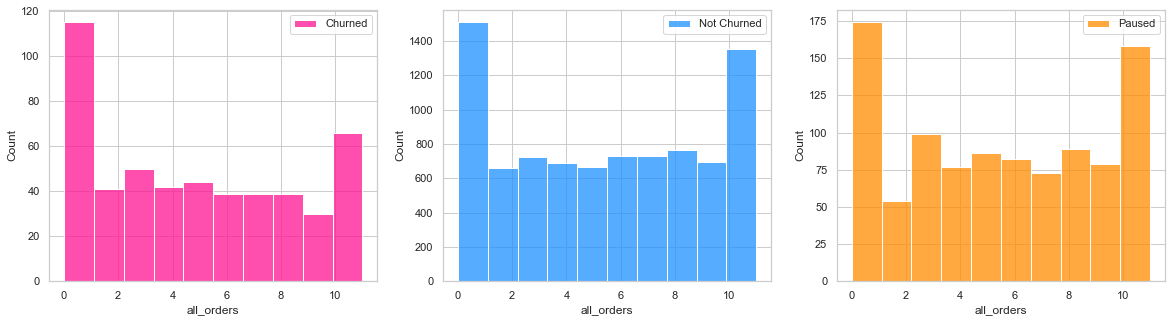

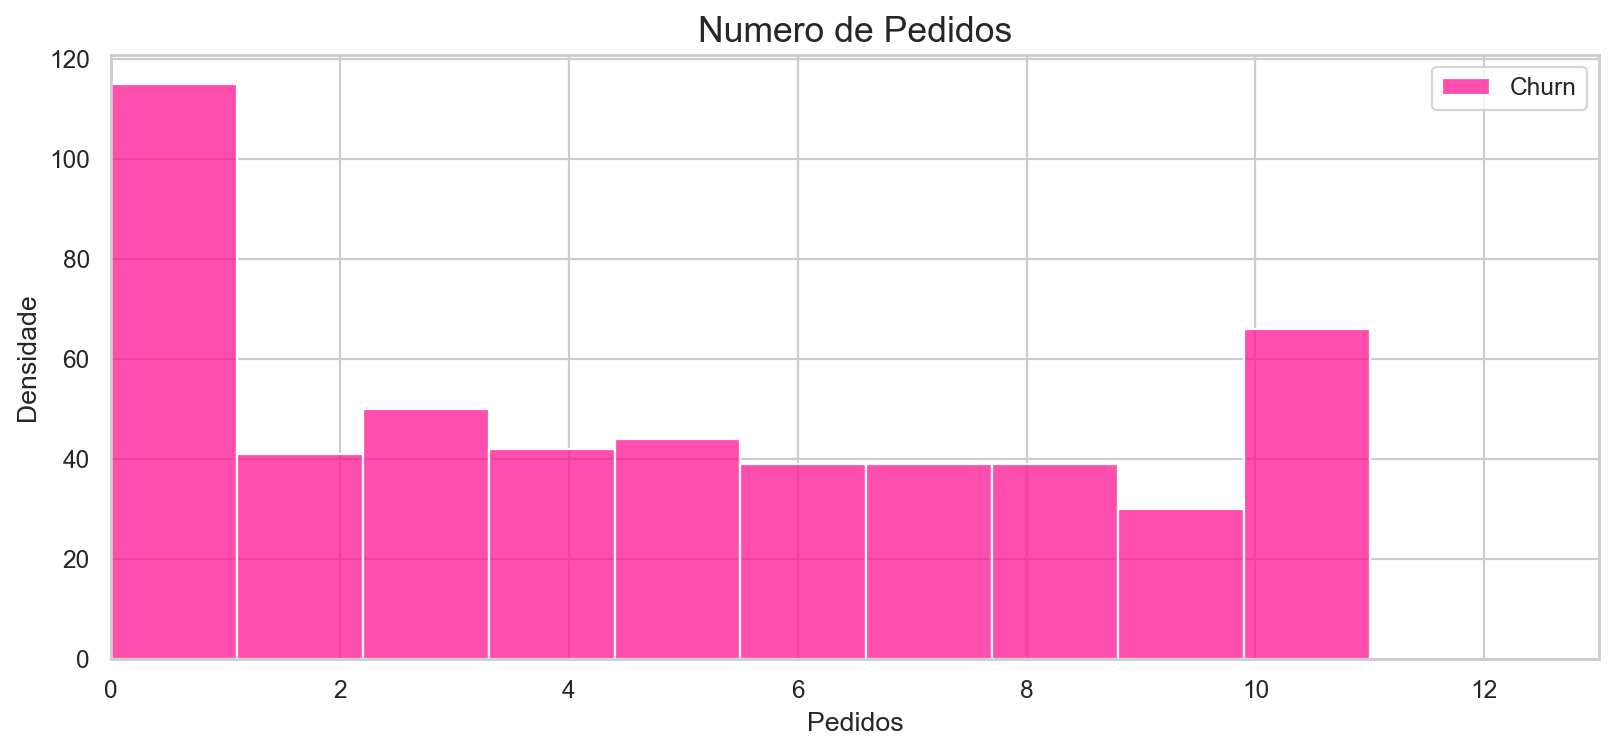

In [416]:
# Todos os pedidos

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 5))

ax = sns.histplot(df[df['churn']== 1].all_orders, bins = 10, ax = axes[0],color='deeppink' ,  label = 'Churned',kde =False)
ax.legend()
ax = sns.histplot(df[df['churn']== 0].all_orders, bins = 10 ,label = 'Not Churned', color='dodgerblue' , ax = axes[1],kde = False)
ax.legend()
ax = sns.histplot(df[df['churn']== -1].all_orders, bins = 10 ,label = 'Paused', color = 'darkorange' ,ax = axes[2],kde = False)
ax.legend()

plt.figure(figsize=(12,5), dpi= 160)

sns.histplot(df.loc[df['churn'] == 1].all_orders,  color="deeppink", label="Churn",)# alpha=.5)#shade=True,
#sns.kdeplot(df.loc[df['churn'] == 0].all_orders, shade=True, color="dodgerblue", label="Not Churned", alpha=.7)
#sns.kdeplot(df.loc[df['churn'] == -1].all_orders, shade=True, color="darkorange", label="Paused", alpha=.10)

plt.title('Numero de Pedidos', fontsize=16)
plt.xlim(0 ,13,1)
plt.xlabel('Pedidos')
plt.ylabel('Densidade')
plt.legend()
plt.show()

In [417]:
churn_allorder = (df.loc[df['churn'] == 1].all_orders)

#churn_allr_mean.describe()

churn_threshold_1 = len((df.loc[(df['churn'] == 1)& (df['all_orders'] >= 0) &(df['all_orders'] < 5)]))
churn_threshold_2 = len((df.loc[(df['churn'] == 1)& (df['all_orders'] >= 0) &(df['all_orders'] < 2)]))
churn_threshold_3 = len((df.loc[(df['churn'] == 1)& (df['all_orders'] == 0)]))
churn_threshold_4 = len((df.loc[(df['churn'] == 1)& (df['all_orders'] > 9) &(df['all_orders'] < 12)]))

churn_total = len(df.loc[df['churn'] == 1])
                        
churn_perc_thresh_1 = churn_threshold_1/churn_total
churn_perc_thresh_2 = churn_threshold_2/churn_total
churn_perc_thresh_3 = churn_threshold_3/churn_total
churn_perc_thresh_4 = churn_threshold_4/churn_total


print(F'Média de pedidos antes do Churn: {churn_allorder.mean()}')
print(F'Percentual de indivíduos que cancelam a assinatura nessa faixa: {churn_perc_thresh_1}')
print(F'Percentual de indivíduos que cancelam a assinatura no primeiro pedido: {churn_perc_thresh_2}')
print(F'Percentual de indivíduos que cancelam a assinatura sem nenhum pedido: {churn_perc_thresh_3}')
print(F'Percentual de indivíduos que cancelam a assinatura acima de 10 pedidos: {churn_perc_thresh_4}')


churn_allorder.describe()

Média de pedidos antes do Churn: 4.857425742574257
Percentual de indivíduos que cancelam a assinatura nessa faixa: 0.4910891089108911
Percentual de indivíduos que cancelam a assinatura no primeiro pedido: 0.22772277227722773
Percentual de indivíduos que cancelam a assinatura sem nenhum pedido: 0.13267326732673268
Percentual de indivíduos que cancelam a assinatura acima de 10 pedidos: 0.1306930693069307


count    505.000000
mean       4.857426
std        3.483446
min        0.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       11.000000
Name: all_orders, dtype: float64

Ao se analisar o primeiro quartil, percebe-se que aproximadamente **5** pedidos acontecem antes do cancelamento. Contudo é apresentada uma nova perspectiva, **22,7%** dos cancelamentos já acontecem no primeiro pedido, e **13,26%** ocorrem sem pedido algum.

**49,1 %** dos cancelamentos ocorrem nessa faixa de **0 a 5 pedidos**  o que é ressalta a importantância de se analisar esse período em específico. Ou seja, a janela de tempo de evasão é menor ainda do que o imaginado.

**13%** dos cancelamentos também ocorrem em clientes com acima de **10 pedidos** o que sugere que pode estar se lidando com 2 perfis de desistentes, precoces e clientes de longa data 

### Análise de Estados e Regiões

Para essa análise foram analisadas as incidências estaduais e regionais.
dividas as populações em cinco grupos referentes as regiões do brasil, estes sendo:

**Grupo 1 : Norte**    
**Grupo 2: Nordeste**    
**Grupo 3: Centro-Oeste**    
**Grupo 4: Sudeste**    
**Grupo 5: Sul**

In [418]:
# Regiao

state_src = {'AC':1,'AM':1,'AP':1,'PA':1,'RO':1,'TO':1,'RR':1 , 
             'MA':2,'PI':2,'CE':2,'RN':2,'PB':2,'PE':2,'AL':2,'SE':2,'BA':2, 
             'MT':3,'DF':3,'GO':3,'MS':3, 'MG':4,'ES':4,'RJ':4,'SP':4, 'PR':5,'SC':5,'RS':5}

df['region'] = df['state'].map(state_src)


region_c = df.loc[df['churn'] == 1].region.value_counts()

churn_total = len(df.loc[df['churn'] == 1])
total_nc = (df.region).value_counts()

region_churn_perc = pd.DataFrame({'region': {1:'Norte',2:'Nordeste',3:'Centro-Oeste',4:'Sudeste',5:'Sul'},'count':region_c,
                               'churn_percentage' : region_c/churn_total,'churn count': region_c ,
                               'total_count': total_nc ,'universal_churn_percentage': region_c/total_nc  })


region_churn_perc.head()

,region,count,churn_percentage,churn count,total_count,universal_churn_percentage
1,Norte,140,0.277228,140,2655,0.052731
2,Nordeste,168,0.332673,168,3250,0.051692
3,Centro-Oeste,80,0.158416,80,1502,0.053262
4,Sudeste,63,0.124752,63,1456,0.043269
5,Sul,54,0.106931,54,1137,0.047493


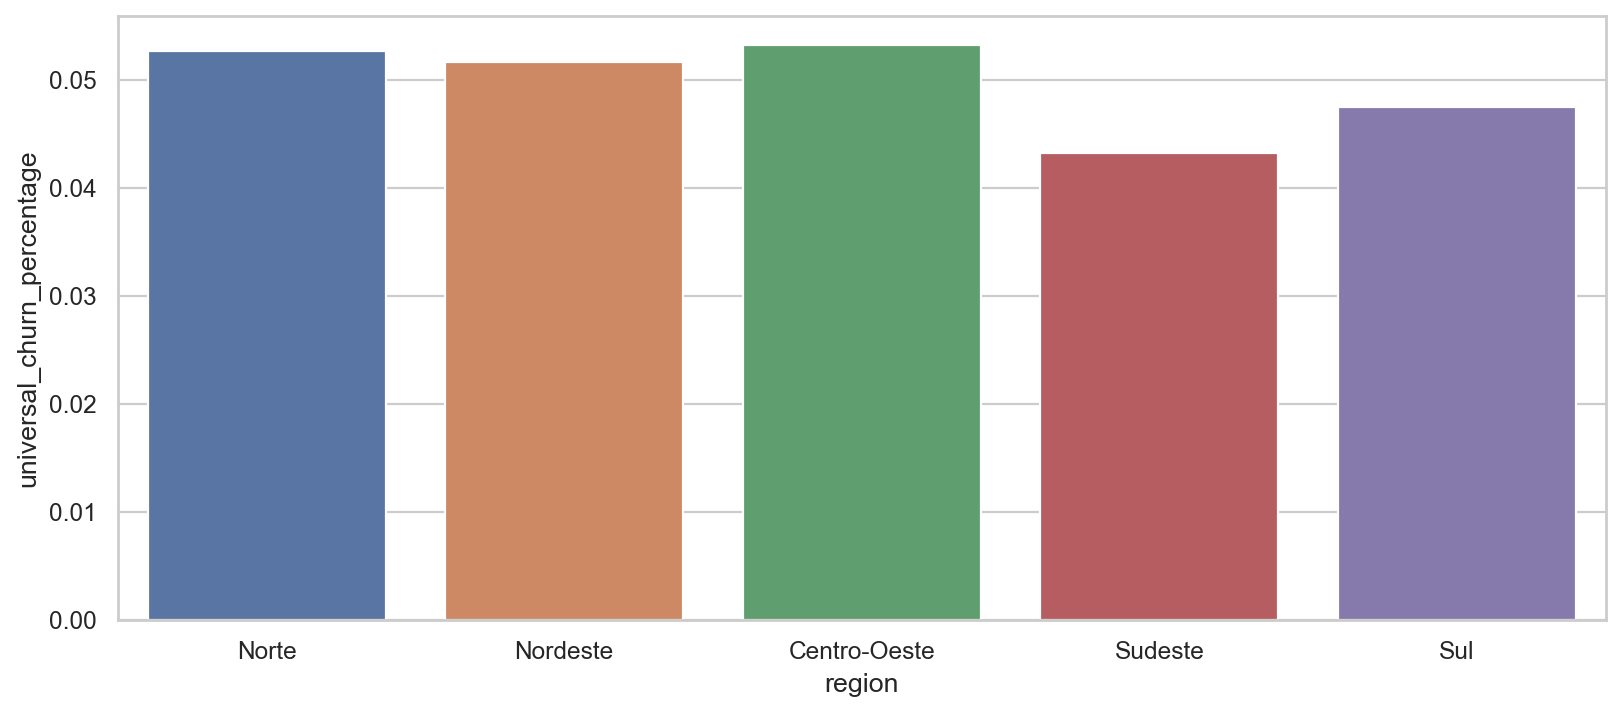

In [419]:
plt.figure(figsize=(12,5), dpi= 160)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x='region', y='universal_churn_percentage', data=region_churn_perc)

**Norte, Nordeste e Centro-Oeste** são grupos que correspondem a uma parcela alta da população. Por coincidência eles também possuem uma taxa de cancelamentos ligeiramente superior a das outras regiões. 

In [420]:
state_src_1 = {'AC':1,'AM':2,'AP':3,'PA':4,'RO':5,'TO':6,'RR':7 , 
             'MA':8,'PI':9,'CE':10,'RN':11,'PB':12,'PE':13,'AL':14,'SE':15,'BA':16, 
             'MT':17,'DF':18,'GO':19,'MS':20, 'MG':21,'ES':22,'RJ':23,'SP':24, 'PR':25,'SC':26,'RS':27}

state_src_2 = {1:'AC',2:'AM',3:'AP',4:'PA',5:'RO',6:'TO',7:'RR', 
             8:'MA',9:'PI',10:'CE',11:'RN',12:'PB',13:'PE',14:'AL',15:'SE',16:'BA', 
             17:'MT',18:'DF',19:'GO',20:'MS', 21:'MG',22:'ES',23:'RJ',24:'SP',25:'PR',26:'SC',27:'RS'}

df['num_state'] = df['state'].map(state_src_1)

num_state_c = df.loc[df['churn'] == 1].num_state.value_counts()

churn_total = len(df.loc[df['churn'] == 1])

total_nc = (df.num_state).value_counts()

num_state_churn_perc = pd.DataFrame({'state': state_src_2,'count':num_state_c,
                               'churn_percentage' : num_state_c/churn_total,'churn count': num_state_c ,
                               'total_count': total_nc ,'universal_churn_percentage': num_state_c/total_nc  })
num_state_churn_perc.head(30)

,state,count,churn_percentage,churn count,total_count,universal_churn_percentage
1,AC,16,0.031683,16,357,0.044818
2,AM,23,0.045545,23,380,0.060526
3,AP,15,0.029703,15,381,0.039370
4,PA,22,0.043564,22,351,0.062678
5,RO,17,0.033663,17,381,0.044619
6,TO,24,0.047525,24,409,0.058680
7,RR,23,0.045545,23,396,0.058081
8,MA,23,0.045545,23,354,0.064972
9,PI,11,0.021782,11,338,0.032544
10,CE,19,0.037624,19,378,0.050265


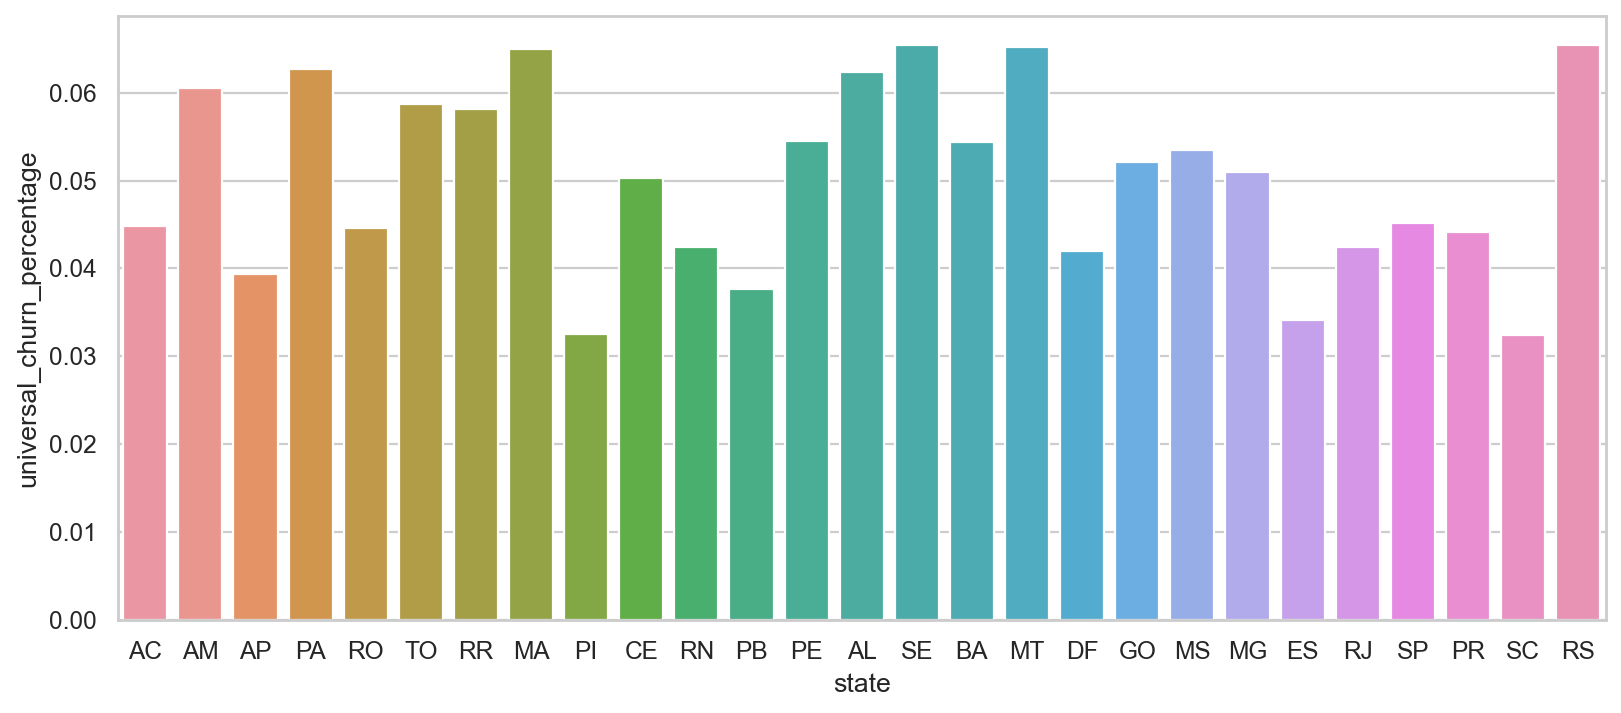

In [421]:
plt.figure(figsize=(12,5), dpi= 160)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x='state', y='universal_churn_percentage', data=num_state_churn_perc)

Dentro das Regiões de foco análisadas anteriormente, deve-se priorizar a atuação nos seguintes estados, **Amazonas, Pará, Maranhão, Tocantins, Roraima, Maranhão, Pernambuco, Alagoas, Sergipe, Bahia, Mato Grosso, Goiás, Mato Grosso do Sul, Minas Gerais e Rio Grande do Sul**, isso pois todos osses estados possuem uma taxa de cancelamento superior a 5% das Assinaturas. 

## As seguintes informações retiradas da análise exploratória foram consideradas relevantes.


A Média de recency entre os clientes ativos: **34**.

**49,9%** dos clientes cancelam com menos de **5 pedidos**.

A idade das populações **não é** um fator correlacionado ao Churn.

O período com maior incidência ocorre no primeiro Quartil (**0 a 442 dias**) dos valores de *duracao* e corresponde a **57%** dos Churns.

A Gastos Acumulados por clientes antes do cancelamento são de até **R$ 1.060,00** e correspondem a **40%** dos Churns. Contudo o alto desvio padrão pode indicar que as evasões estão concentradas antes mesmo dos **300,00**

O ticket médio dos clientes é de **217,00**.

Clientes com assinatura do tipo **2.X.X** são uma população considerável e possuem índices mais altos de cancelamento do que detentores de assinaturas **3.X.X e 4.X.X**. Aproximadamente **6%** das pessoas que possuem uma assinatura tipo 2 cancelam, essa relação é de 4% para as de tipo 3 e 4% para as de tipo 4, o que indica que esse grupo 2 é ligeiramente mais tendencioso.

Há em média **5** pedidos antes do churn que correspondem a **49,4%** dos casos. Contudo **35,9%** das assinaturas são canceladas sem nenhum ou com apenas um pedido.

Estratégias de marketing dos tipos ***organic_search, none e telegram_whatsapp*** são responsáveis por **58,6%** dos cancelamentos de assinatura, suas porcentagens individuais estão ligeiramente superiores as dos restante dos grupos ne média de **6%** dos assinantes vindos desses canais cancelam. Os outros tipos de canal resultam num churn de aproximadamente **4%** cada um. 

Clientes das **regiões norte, nordeste e centro** são os mais suscetíveis ao churn, contudo há uma lista de estados que devem ser priorizados na atuação.

Se Clientes enquanto estão ativos realizam pedidos a cada **34 dias** em média, possuem um ticket médio de **217 reais**  e acumulam gastos de até **1060 reais** antes de cancelarem sua assinatura, podemos testar nossa Hipótese da duração média até o churn. Para isso dividimos o gasto total pelo ticket médio e multiplicamos pelos dias **[(1060/217).34]** resultando em **166 dias** dentro do período (**0 até 442**) descrito pela análise.

## Testando hipóteses em busca de correlações:


Para se testar as hipóteses serão utilizados os parâmetros considerados relevantes: 

Categorias de Marketing: **mkt_src == [2, 5 & 6], (Orgânico, none, telegram/Whatsapp)**.

Número de pedidos inferior a **5**

Regiões: **region = [1, 2 & 3], (Norte, Nordeste, Centro-Oeste)**

Para ser uma hipótese válida são esperados resultados semelhantes a estes dentro dos casos de Churn.

**duracao = 0:450**

**average_ticket <=220** 

**all_revenue <= 1100**


In [429]:
alfa  = df.loc[(df['churn'] == 1) & ((df['mkt_src'] == 2)|(df['mkt_src']== 5)|(df['mkt_src'] == 6))
& ((df['all_orders'] < 5 ))
& ((df['region'] == 1) | (df['region'] == 2) | (df['region'] == 3))]


print(F'Média de Receita Acumulada: {alfa.all_revenue.mean()}')
print(F'Média de Pedidos: {alfa.all_orders.mean()}')
print(F'Ticket Médio: {alfa.average_ticket.mean()}')
print(F'Duração Média {alfa.duracao.mean()}')

alfa_churn_rate = len(alfa)/505
print(F'Churn Rate para a hipótese {alfa_churn_rate}')

alfa.describe()

Média de Receita Acumulada: 426.28667231540675
Média de Pedidos: 1.954954954954955
Ticket Médio: 215.80315758346967
Duração Média 370.8378378378378
Churn Rate para a hipótese 0.2198019801980198


,average_ticket,items_quantity,all_revenue,all_orders,recency,churn,duracao,idade,age_group,mkt_src,simple_version,region,num_state
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.0,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,215.803158,8.783784,426.286672,1.954955,657.603604,1.0,370.837838,56.599099,3.216216,3.180180,3.504505,1.891892,11.162162
std,22.057677,2.800667,307.576916,1.364401,498.759083,0.0,423.776496,16.760666,1.423219,1.733091,1.102673,0.742861,6.083570
min,159.998719,3.000000,0.000000,0.000000,1.000000,1.0,0.000000,26.100000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,201.564882,7.000000,202.307048,1.000000,183.500000,1.0,54.500000,44.950000,2.000000,2.000000,3.000000,1.000000,6.000000
50%,216.166860,9.000000,412.987028,2.000000,583.000000,1.0,122.000000,58.000000,3.000000,2.000000,4.000000,2.000000,12.000000
75%,231.273965,10.000000,691.753602,3.000000,1096.500000,1.0,512.000000,70.750000,4.500000,5.000000,4.000000,2.000000,16.000000
max,274.374620,16.000000,1022.982831,4.000000,1820.000000,1.0,1598.000000,82.000000,5.000000,6.000000,6.000000,3.000000,20.000000


In [431]:
beta  = df.loc[(df['churn'] == 1) & ((df['mkt_src'] == 2)|(df['mkt_src']== 5)|(df['mkt_src'] == 6))
& ((df['all_orders'] < 5 ))]


print(F'Média de Receita Acumulada: {beta.all_revenue.mean()}')
print(F'Média de Pedidos: {beta.all_orders.mean()}')
print(F'Ticket Médio: {beta.average_ticket.mean()}')
print(F'Duração Média {beta.duracao.mean()}')

beta_churn_rate = len(beta)/505
print(F'Churn Rate para a hipótese {beta_churn_rate}')

beta.describe()

Média de Receita Acumulada: 411.1858920336862
Média de Pedidos: 1.8918918918918919
Ticket Médio: 216.07133967134845
Duração Média 354.0337837837838
Churn Rate para a hipótese 0.29306930693069305


,average_ticket,items_quantity,all_revenue,all_orders,recency,churn,duracao,idade,age_group,mkt_src,simple_version,region,num_state
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.0,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,216.071340,8.702703,411.185892,1.891892,638.256757,1.0,354.033784,55.883108,3.155405,3.135135,3.547297,2.533784,14.364865
std,22.148810,2.817485,320.191642,1.438703,483.019783,0.0,402.024899,16.673754,1.417638,1.716858,1.077503,1.311465,7.723230
min,159.998719,3.000000,0.000000,0.000000,1.000000,1.0,0.000000,26.100000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,201.568832,7.000000,182.110262,1.000000,184.750000,1.0,52.000000,43.225000,2.000000,2.000000,3.000000,1.750000,7.750000
50%,216.469709,9.000000,404.233748,2.000000,574.000000,1.0,124.000000,57.100000,3.000000,2.000000,4.000000,2.000000,15.000000
75%,231.270985,10.000000,690.839361,3.000000,1024.250000,1.0,497.750000,70.500000,4.000000,5.000000,4.000000,3.250000,20.250000
max,274.374620,16.000000,1022.982831,4.000000,1820.000000,1.0,1598.000000,82.000000,5.000000,6.000000,6.000000,5.000000,27.000000


In [424]:
gama  = df.loc[(df['churn'] == 1) & ((df['mkt_src'] == 2)|(df['mkt_src']== 5)|(df['mkt_src'] == 6))
& ((df['region'] == 1) | (df['region'] == 2) | (df['region'] == 3))]


print(F'Média de Receita Acumulada: {gama.all_revenue.mean()}')
print(F'Média de Pedidos: {gama.all_orders.mean()}')
print(F'Ticket Médio: {gama.average_ticket.mean()}')
print(F'Duração Média {gama.duracao.mean()}')

gama_churn_rate = len(gama)/505
print(F'Churn Rate para a hipótese {gama_churn_rate}')

gama.describe()

Média de Receita Acumulada: 1047.2013426968315
Média de Pedidos: 4.812785388127854
Ticket Médio: 216.55200300289738
Duração Média 467.94520547945206
Churn Rate para a hipótese 0.43366336633663366


,average_ticket,items_quantity,all_revenue,all_orders,recency,churn,duracao,idade,age_group,mkt_src,simple_version,region,num_state
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.0,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,216.552003,8.652968,1047.201343,4.812785,662.579909,1.0,467.945205,54.230137,3.009132,3.210046,3.438356,1.853881,10.712329
std,21.994691,3.024082,755.306247,3.408923,453.926101,0.0,424.566629,16.484769,1.417424,1.737786,1.079241,0.758210,5.965065
min,155.327863,1.000000,0.000000,0.000000,1.000000,1.0,0.000000,26.100000,1.000000,2.000000,0.000000,1.000000,1.000000
25%,201.564882,7.000000,409.170281,2.000000,271.000000,1.0,120.500000,39.450000,2.000000,2.000000,3.000000,1.000000,6.000000
50%,216.718721,8.000000,955.659889,4.000000,588.000000,1.0,327.000000,55.000000,3.000000,2.000000,4.000000,2.000000,11.000000
75%,231.323339,10.000000,1564.122540,7.500000,992.000000,1.0,721.000000,67.950000,4.000000,5.000000,4.000000,2.000000,16.000000
max,274.374620,18.000000,2873.700656,11.000000,1820.000000,1.0,1702.000000,82.000000,5.000000,6.000000,6.000000,3.000000,20.000000


In [430]:
delta  = df.loc[(df['churn'] == 1) 
& ((df['all_orders'] < 5 ))
& ((df['region'] == 1) | (df['region'] == 2) | (df['region'] == 3))]


print(F'Média de Receita Acumulada: {delta.all_revenue.mean()}')
print(F'Média de Pedidos: {delta.all_orders.mean()}')
print(F'Ticket Médio: {delta.average_ticket.mean()}')
print(F'Duração Média {delta.duracao.mean()}')

delta_churn_rate = len(delta)/505
print(F'Churn Rate para a hipótese {delta_churn_rate}')

delta.describe()

Média de Receita Acumulada: 400.3463011443181
Média de Pedidos: 1.8307692307692307
Ticket Médio: 217.51268951661228
Duração Média 372.1794871794872
Churn Rate para a hipótese 0.38613861386138615


,average_ticket,items_quantity,all_revenue,all_orders,recency,churn,duracao,idade,age_group,mkt_src,simple_version,region,num_state
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.0,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,217.512690,8.964103,400.346301,1.830769,639.969231,1.0,372.179487,55.480513,3.169231,3.082051,3.476923,1.897436,11.107692
std,21.551782,2.644532,316.521081,1.424049,487.120986,0.0,422.666223,16.638699,1.427664,1.500322,1.113752,0.731996,5.852455
min,159.998719,3.000000,0.000000,0.000000,1.000000,1.0,0.000000,26.100000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,201.753890,7.000000,167.213258,1.000000,181.000000,1.0,49.500000,40.000000,2.000000,2.000000,3.000000,1.000000,6.000000
50%,218.373280,9.000000,403.113961,2.000000,556.000000,1.0,123.000000,57.100000,3.000000,3.000000,4.000000,2.000000,12.000000
75%,231.693828,11.000000,679.632518,3.000000,1040.500000,1.0,743.000000,70.150000,4.000000,4.000000,4.000000,2.000000,16.000000
max,274.374620,16.000000,1022.982831,4.000000,1820.000000,1.0,1598.000000,82.000000,5.000000,6.000000,7.000000,3.000000,20.000000


A hipótese acima **cumpriu com o esperado, as médias de ticket médio, número de vendas e receita total estão suficientemente próximas das médias que se esperava encontrar**. Entretanto, existe um grande desvio padrão apresentado na receita total, isso pode ser um indicativo do cancelamento precoce ainda nos primeiros meses, esse alto desvio padrão se repete na duração, outro fator somador na hipótese das desistências precoces.  

Como se suspeita que as evasões ocorrem ainda nos primeiros meses vamos observar o intervalo já discutido nas análises anteriores e ver se ele se mostra significativo dentro da hipótese. Esse intervalo vai de 0 a 450 dias.

In [432]:
dur_alfa = len(alfa.loc[(alfa['duracao'] <450)])
dur_beta = len(alfa.loc[(alfa['duracao'] <450)])
dur_gama = len(alfa.loc[(alfa['duracao'] <450)])
dur_delta = len(alfa.loc[(alfa['duracao'] <450)])


print(F'Porcentagem de Cancelamentos até 450 dias dentro da hipótese Alfa : {dur_alfa/len(alfa)}')
print(F'Porcentagem de Cancelamentos até 450 dias dentro da hipótese Beta : {dur_beta/len(beta)}')
print(F'Porcentagem de Cancelamentos até 450 dias dentro da hipótese Gama : {dur_gama/len(gama)}')
print(F'Porcentagem de Cancelamentos até 450 dias dentro da hipótese Delta : {dur_delta/len(delta)}')

Porcentagem de Cancelamentos até 450 dias dentro da hipótese Alfa : 0.6396396396396397
Porcentagem de Cancelamentos até 450 dias dentro da hipótese Beta : 0.4797297297297297
Porcentagem de Cancelamentos até 450 dias dentro da hipótese Gama : 0.019267299864314788
Porcentagem de Cancelamentos até 450 dias dentro da hipótese Delta : 0.3641025641025641


Os resultados acima mostram que a suspeita é verdadeira, **57,5%** dos cancelamentos da hipótese ocorreram  em até 450 dias e **21%** ocorreram nos primeiros 3 meses.

Sozinhos essa população que atende a hipótese representa **43,3%** do universo dos cancelamentos. Sendo que destes, **24,95%** cancelam nos primeiros **450 dias** e **9,1%** nos primeiros **3 meses**. 

A hipótese **é satifatória**, pois existe correlação entre multiplas variáveis ao mesmo tempo,cabe agora analisar os dados referentes aos cadastros ativos e pausados para avaliar se uma solução embasada na hipótese surtiria o efeito esperado para o time de assinaturas.

### Aplicando as melhores hipóteses as Populações Active e Paused



Existem 3685 clientes em circustâncias semelhantes a hipótese
Esses clientes representam 38.8098999473407% do total de clientes que não evadiram

Média de Receita Acumulada: 1178.8044342373148
Média de Pedidos: 5.431207598371778
Ticket Médio: 217.09159299211746
Duração Média:888.4477611940298

Existem 958 clientes em circustâncias extremamente semelhantes a hipótese
Esses clientes representam 10.089520800421274% do total de clientes que não evadiram

Média de Receita Acumulada até 450 dias: 978.0281220741449
Média de Pedidos até 450 dias:: 4.524008350730689
Ticket Médio até 450 dias:: 216.05105568647392
Duração Média até 450 dias: 213.6242171189979



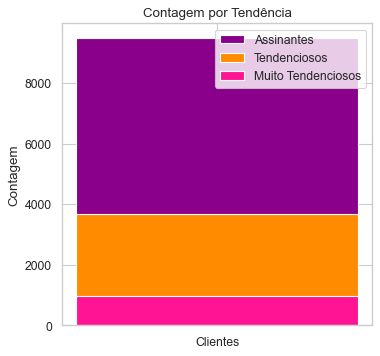

In [434]:
gama  = df.loc[((df['churn'] == 0)|(df['churn'] == -1))
&((df['mkt_src'] == 2)|(df['mkt_src']== 5)|(df['mkt_src'] == 6))
& ((df['region'] == 1) | (df['region'] == 2) | (df['region'] == 3))]

gama_v = gama.loc[gama['duracao'] <= 450 ]
clientes_not_churn = df.loc[((df['churn'] == 0)|(df['churn'] == -1))]

aux = len(gama)
aux2 = len(gama_v)
aux3 = len(clientes_not_churn)

print(F'Existem {aux} clientes em circustâncias semelhantes a hipótese')
print(F'Esses clientes representam {(aux/aux3)*100}% do total de clientes que não evadiram')
print()

print(F'Média de Receita Acumulada: {gama.all_revenue.mean()}')
print(F'Média de Pedidos: {gama.all_orders.mean()}')
print(F'Ticket Médio: {gama.average_ticket.mean()}')
print(F'Duração Média:{gama.duracao.mean()}')
print()

print(F'Existem {aux2} clientes em circustâncias extremamente semelhantes a hipótese')
print(F'Esses clientes representam {(aux2/aux3)*100}% do total de clientes que não evadiram')
print()

print(F'Média de Receita Acumulada até 450 dias: {gama_v.all_revenue.mean()}')
print(F'Média de Pedidos até 450 dias:: {gama_v.all_orders.mean()}')
print(F'Ticket Médio até 450 dias:: {gama_v.average_ticket.mean()}')
print(F'Duração Média até 450 dias: {gama_v.duracao.mean()}')
print()


fig, ax = plt.subplots(figsize=(5,5), dpi= 80)

ax.bar('Clientes', aux3,label='Assinantes', color='darkmagenta')
ax.bar('Clientes', aux, label='Tendenciosos',color='darkorange')
ax.bar('Clientes', aux2, label='Muito Tendenciosos',color='deeppink')

ax.set_ylabel('Contagem')
ax.set_title('Contagem por Tendência')
ax.legend()

plt.show()

Existem 2947 clientes em circustâncias semelhantes a hipótese
Esses clientes representam 31.037388098999475% do total de clientes que não evadiram

Média de Receita Acumulada: 423.2216777175149
Média de Pedidos: 1.9507974211062098
Ticket Médio: 216.9646432959657
Duração Média:788.1364099083814

Existem 1003 clientes em circustâncias extremamente semelhantes a hipótese
Esses clientes representam 10.563454449710374% do total de clientes que não evadiram

Média de Receita Acumulada até 450 dias: 366.8599623841683
Média de Pedidos até 450 dias:: 1.690927218344965
Ticket Médio até 450 dias:: 216.6234038537618
Duração Média até 450 dias: 202.09571286141576



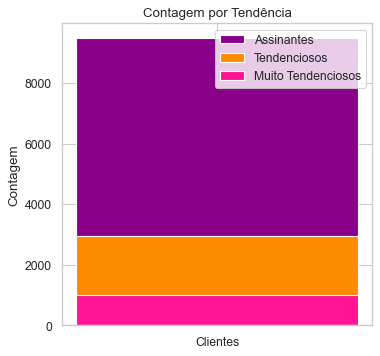

In [433]:
delta  = df.loc[((df['churn'] == 0)|(df['churn'] == -1))
& ((df['all_orders'] < 5 ))
& ((df['region'] == 1) | (df['region'] == 2) | (df['region'] == 3))]

delta_v = delta.loc[delta['duracao'] <= 450 ]
clientes_not_churn = df.loc[((df['churn'] == 0)|(df['churn'] == -1))]

aux = len(delta)
aux2 = len(delta_v)
aux3 = len(clientes_not_churn)

print(F'Existem {aux} clientes em circustâncias semelhantes a hipótese')
print(F'Esses clientes representam {(aux/aux3)*100}% do total de clientes que não evadiram')
print()

print(F'Média de Receita Acumulada: {delta.all_revenue.mean()}')
print(F'Média de Pedidos: {delta.all_orders.mean()}')
print(F'Ticket Médio: {delta.average_ticket.mean()}')
print(F'Duração Média:{delta.duracao.mean()}')
print()

print(F'Existem {aux2} clientes em circustâncias extremamente semelhantes a hipótese')
print(F'Esses clientes representam {(aux2/aux3)*100}% do total de clientes que não evadiram')
print()

print(F'Média de Receita Acumulada até 450 dias: {delta_v.all_revenue.mean()}')
print(F'Média de Pedidos até 450 dias:: {delta_v.all_orders.mean()}')
print(F'Ticket Médio até 450 dias:: {delta_v.average_ticket.mean()}')
print(F'Duração Média até 450 dias: {delta_v.duracao.mean()}')
print()


fig, ax = plt.subplots(figsize=(5,5), dpi= 80)

ax.bar('Clientes', aux3,label='Assinantes', color='darkmagenta')
ax.bar('Clientes', aux, label='Tendenciosos',color='darkorange')
ax.bar('Clientes', aux2, label='Muito Tendenciosos',color='deeppink')

ax.set_ylabel('Contagem')
ax.set_title('Contagem por Tendência')
ax.legend()

plt.show()

Com uma capacidade de impacto maior a hipotese **Gama** pode surtir efeito em **38,8%** de todos os clientes que não cancelaram  pois se encontram dentro dos parâmetros selecionados, eles são indicados com o uso de 2 parâmetros simultâneos o que indica correlação entre eles.

Contudo Pode-se perceber que existem **10%** dos clientes ativos ou pausados que se encontram em parâmetros muito próximos aos apresentados pelas análises, inclusive na janela de tempo que gera a princiapal evasão (**0:450**).Levando em consideração que eles atendem a **3 parâmetros simultâneamente**. **Eles devem ser o foco de novas ações do time de assinaturas para evitar a sua evasão**.

## Conclusão: Aprendizado & Próximos Passos 

### Aprendizados

Como apontado pelas várias análises que foram feitas, além de existirem fatores que estão diretamente ligados a decisão pelo cancelamento. Existem ainda correlações entre esses fatores, o que fornece um direcionamento mais claro para uma atuação imediata do time de negócios.

Esses fatores que aparentam estar ligados a taxa de Churn são apresentados a seguir: 

1.  Clientes com menos de 5 pedidos possuem propensão ao cancelamento.

2.  Clientes das regiões Nordeste, Norte e Centro-Oeste possuem propensão ao cancelamento.

3.  Clientes que cancelaram foram alvos de estratégias baseadas em Telegram/Whatsapp, Trafego Orgânico ou até mesmo nenhum contato.

4.  57% dos cancelamentos ocorreram em até 450 dias.

5 . Existe correlação entre os fatores, Marketing e Região. 
Indivíduos enquadrados nesse perfil devem ser priorizados, visto que correspondem a 43% dos cancelamentos e 38,8% dos Assinantes ativos ou pausados.


Ao associar os fatores, **canal de marketing, número de pedidos e região**. Confirmaram-se valores próximos levantados pela hipóteses estes sendo, o **ticket médio de 220 reais**, a **duração média entre 0 e 450 dias** e uma **receita total média próxima a 1100 reais**. O que indica correlação entre esses fatores. Essa população que atende a melhor das hipóteses **(Gama)** representa **43,3%** do universo dos cancelamentos, e **38,8%** da base de clientes ativos, o que é bastante significativo.

### Próximos Passos 

Com os aprendizados da análise, existem dois passos imediatos que podem ser tomados. Ambos serão baseados na mesma estratégia de atuação, contudo terão como foco populações ligeiramente distintas. 

Utilizar o CRM para identificar padrões de consumo e então estimular esse consumo por meio de cupons, créditos e descontos personalizados assim como frete grátis para populações que atendam aos seguintes parâmetros, priorizando os que apresentam mais de um parâmetro ao mesmo tempo:

a. Se enquadram na hipótese Gama. 

b.	Possuem menos de 5 pedidos.

c.	Estão Localizados em estados da Região, Norte, Nordeste e Centro-Oeste. Obedecendo aos estados prioritários.
**Amazonas, Pará, Maranhão, Tocantins, Roraima, Maranhão, Pernambuco, Alagoas, Sergipe, Bahia, Mato Grosso, Goiás, Mato Grosso do Sul, Minas Gerais e Rio Grande do Sul**

d.	Clientes que foram alvo de estratégias baseadas em ***organic_search, none e telegram_whatsapp***

e. Clientes que tenham assinatura de 0 a 450 dias.

